<a href="https://colab.research.google.com/github/kazisaymon/-Carmart-Project/blob/main/E_Commerce_Customer_Behavior_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/ecommerce_customer_behavior_dataset (2).csv')

# Data cleaning
df = df.drop_duplicates()
df['Discount Availed'] = df['Discount Availed'].map({True: 1, False: 0})

# Handle missing values (if any)
print("Missing values:\n", df.isnull().sum())  # Verify no missing values

# Convert categorical data
df = pd.get_dummies(df, columns=['Gender', 'Location', 'Device Type',
                                 'Payment Method', 'Subscription Status',
                                 'Product Category', 'Customer Satisfaction'])

Missing values:
 Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64


In [ ]:
# --------------------------------------
# 📦 1. Import Libraries
# --------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set(style="whitegrid")


In [ ]:

# 📂 2. Load Dataset

df = pd.read_csv("/content/ecommerce_customer_behavior_dataset (2).csv")
df.head()


Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0       1       20   Other     Dhaka        Toys             202.54          
1       2       39    Male   Rangpur      Sports             655.94          
2       3       64    Male    Khulna        Home             963.65          
3       4       65   Other  Rajshahi      Beauty             485.59          
4       5       67    Male   Rangpur        Home             143.27          

   Time Spent on Website (min) Device Type   Payment Method   \
0              44                  Mobile   Cash on Delivery   
1              27                 Desktop      Bank Transfer   
2               9                  Tablet      Bank Transfer   
3              39                 Desktop      Bank Transfer   
4              17                  Tablet         Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0         True                   4                    True        
1         True                   1                   False        
2        False                   8                    True        
3         True                   1                    True        
4        False                   8                    True        

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0           5                    4                    Free        
1           1                    7                    Free        
2           4                    9                 Premium        
3           5                   10                   Trial        
4           4                    1                 Premium        

  Customer Satisfaction  
0            Low         
1         Medium         
2         Medium         
3         Medium         
4           High

In [ ]:

# 🧼 3. Data Preprocessing


# Check for missing/duplicate
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Convert categorical to category if needed (optional optimization)
categorical_cols = ['Gender', 'Location', 'Product Category', 'Device Type', 'Payment Method',
                    'Subscription Status', 'Customer Satisfaction']
for col in categorical_cols:
    df[col] = df[col].astype('category')


Missing values:
 Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64

Duplicate rows: 0


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


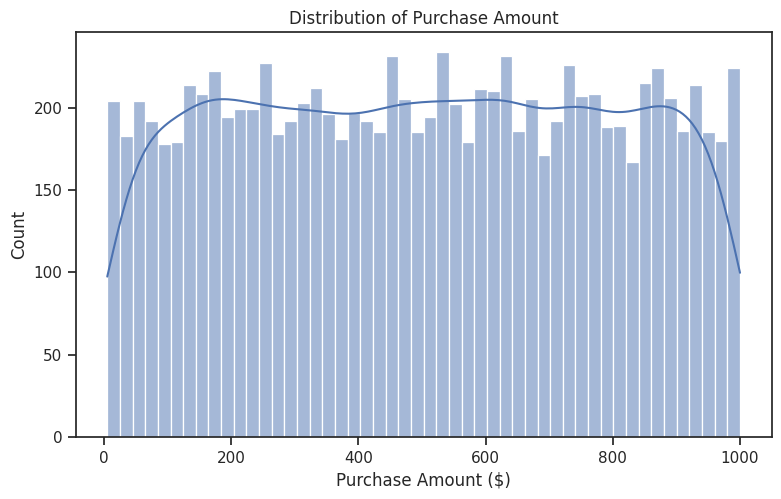

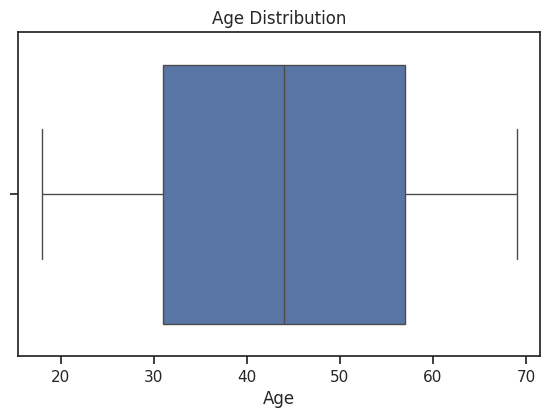

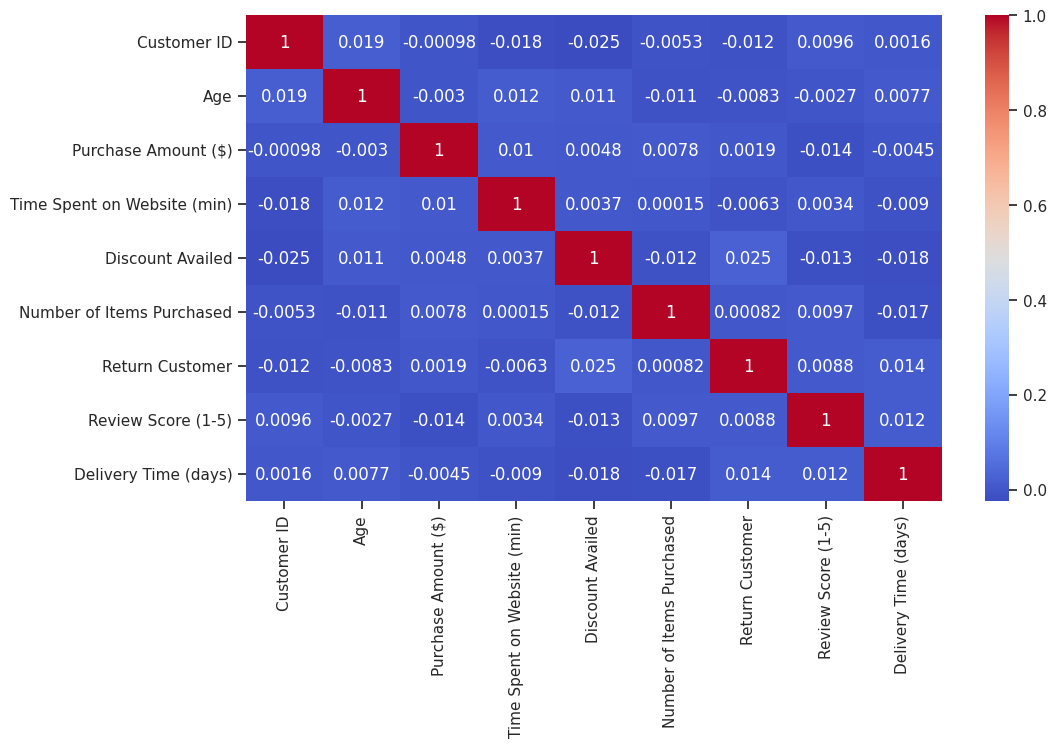

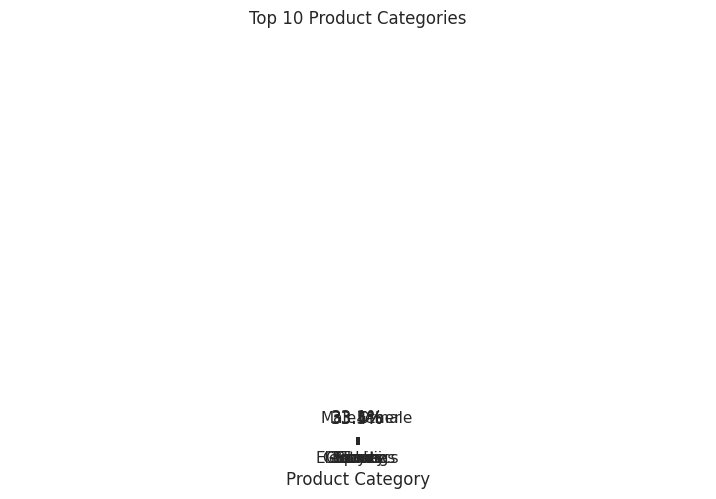

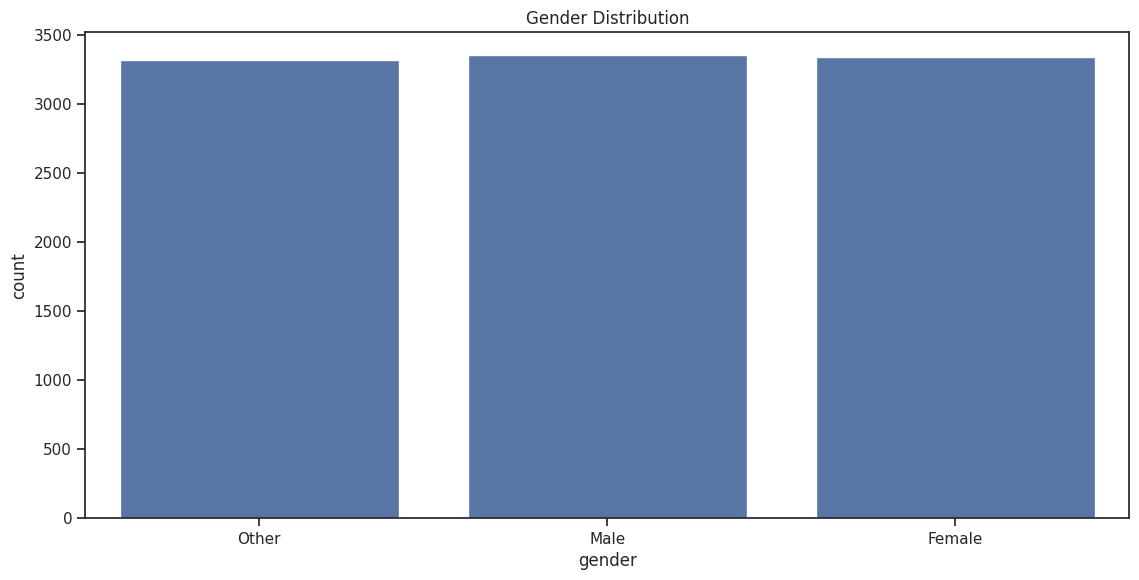

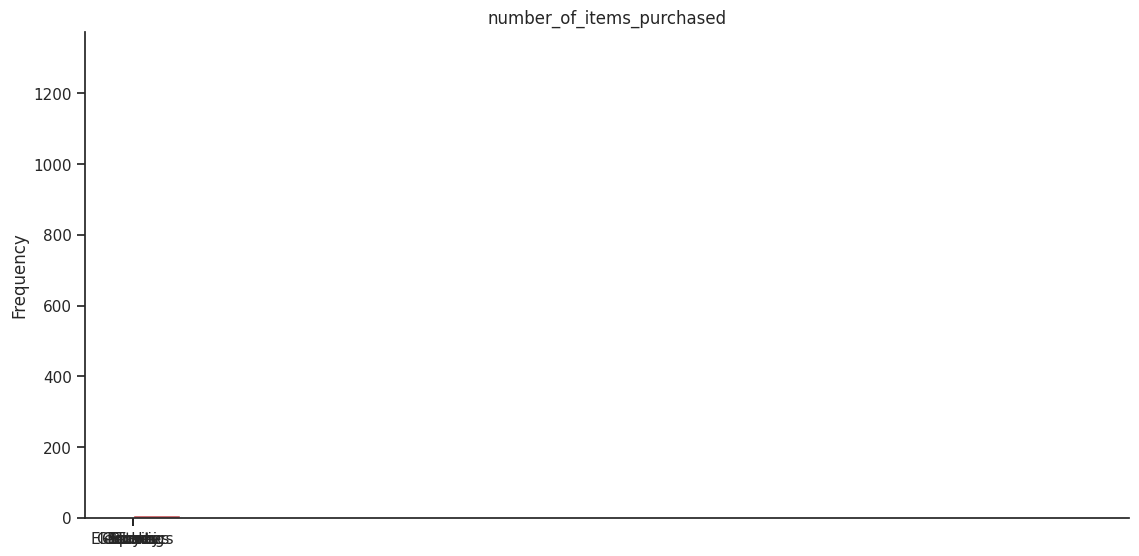

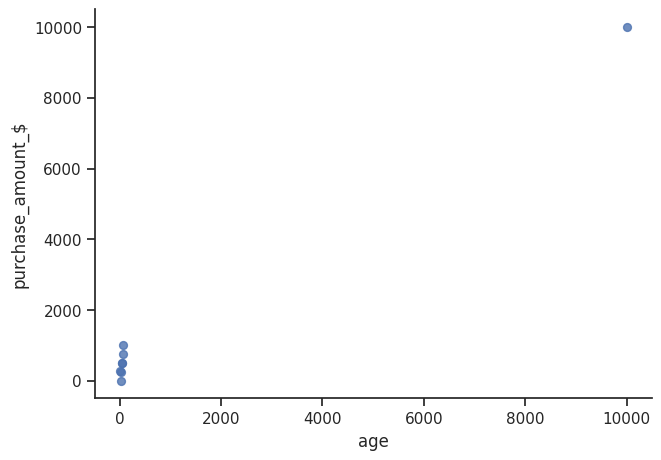

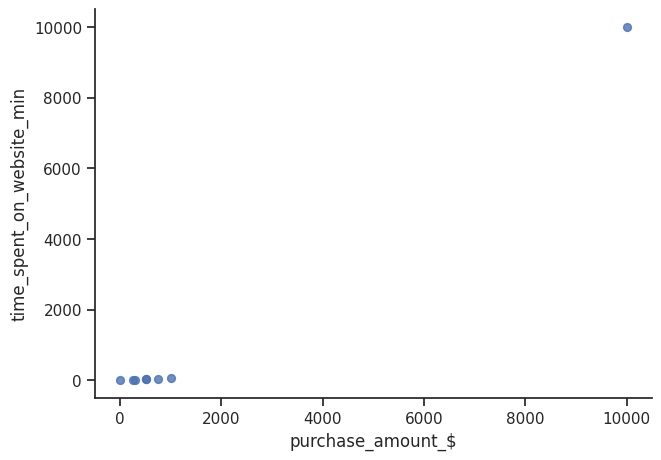

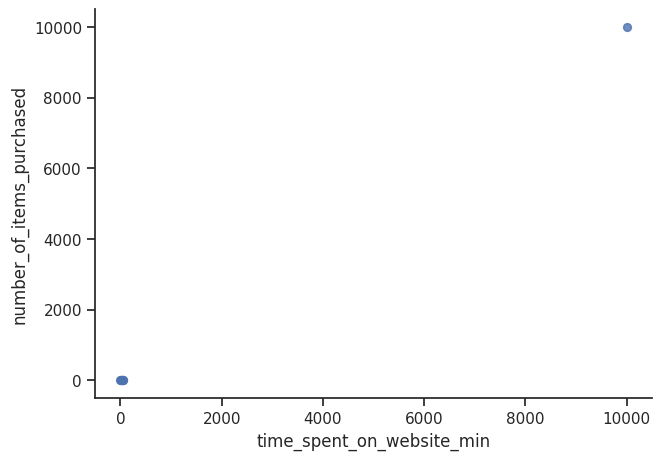

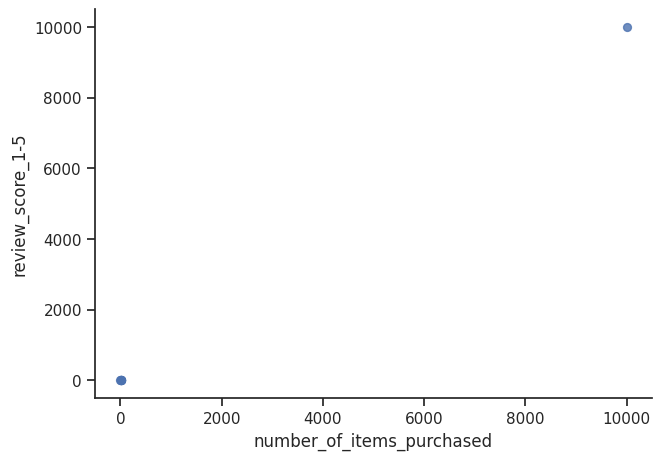

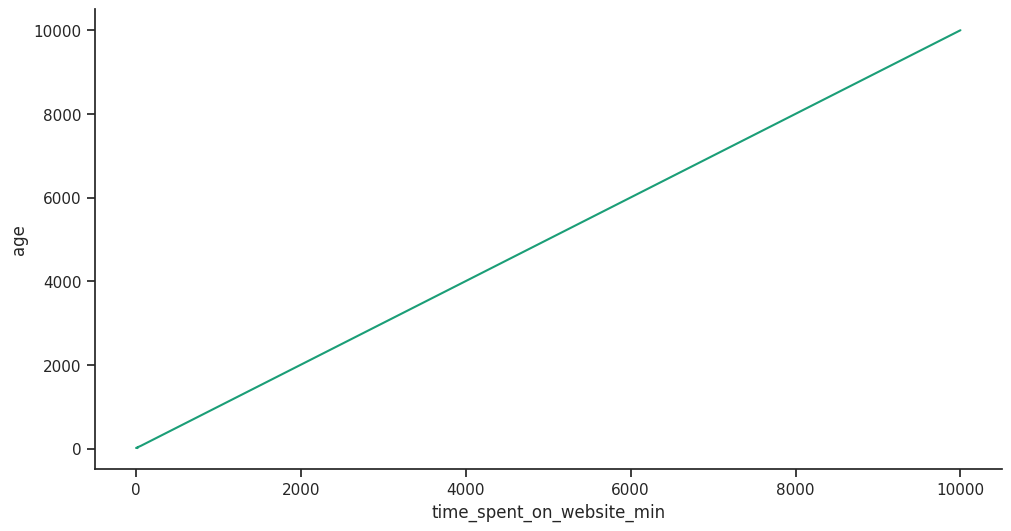

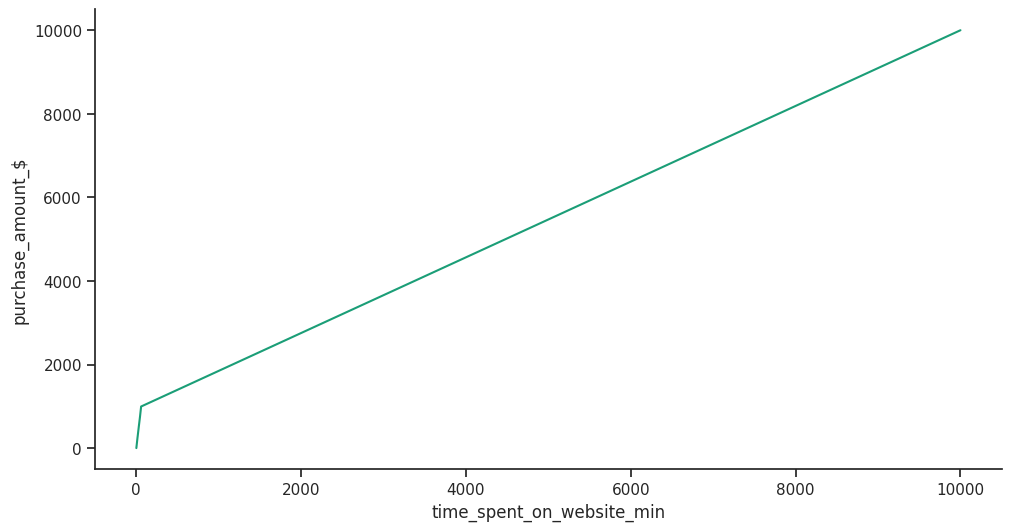

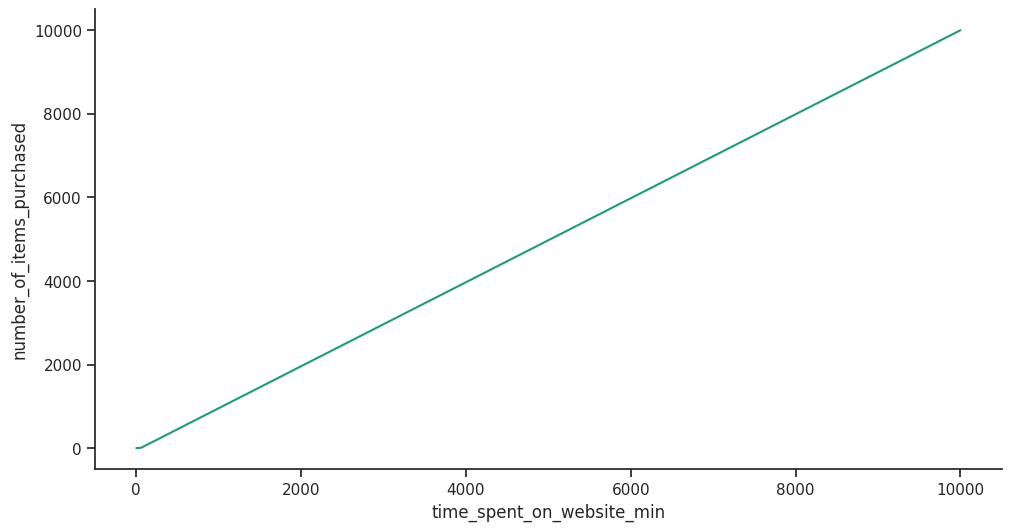

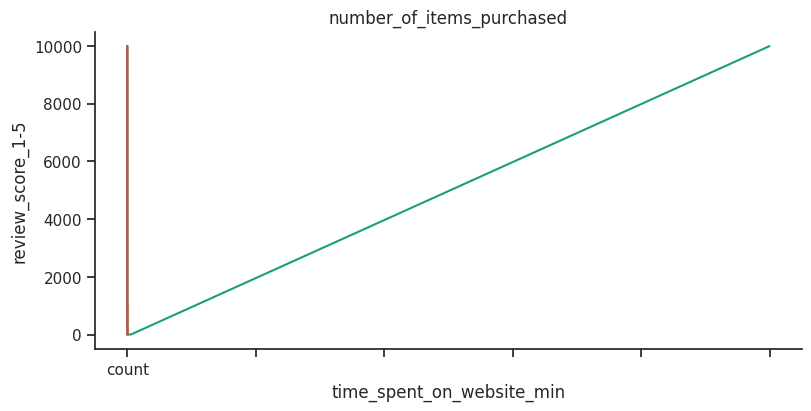

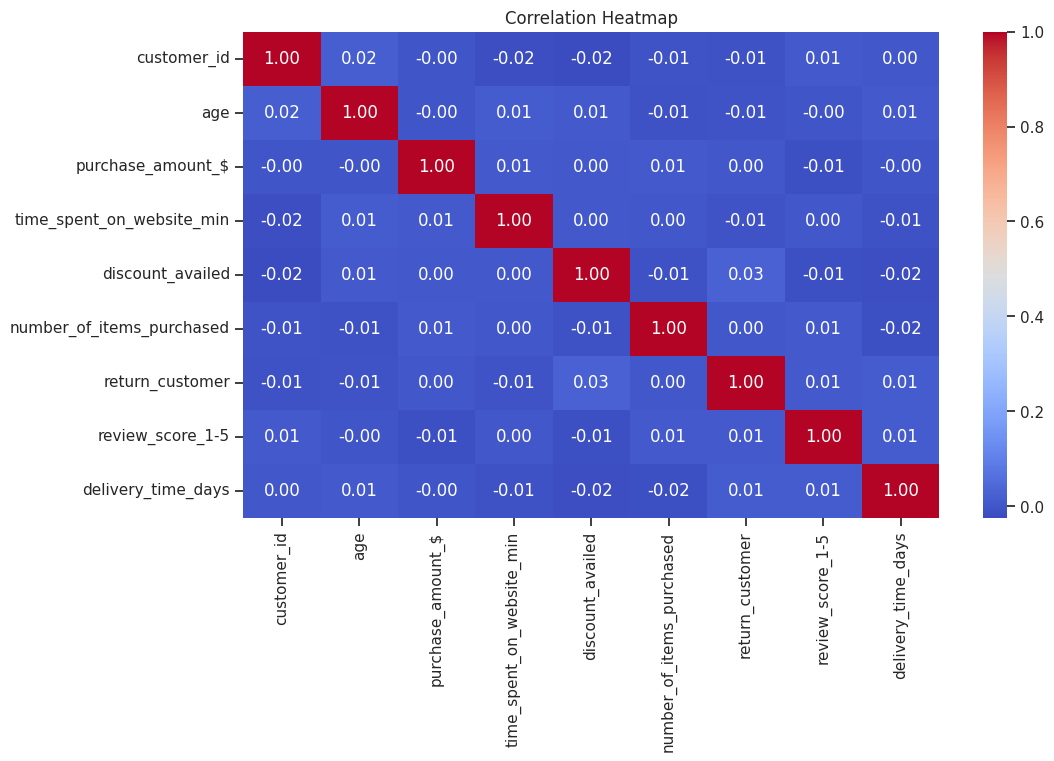

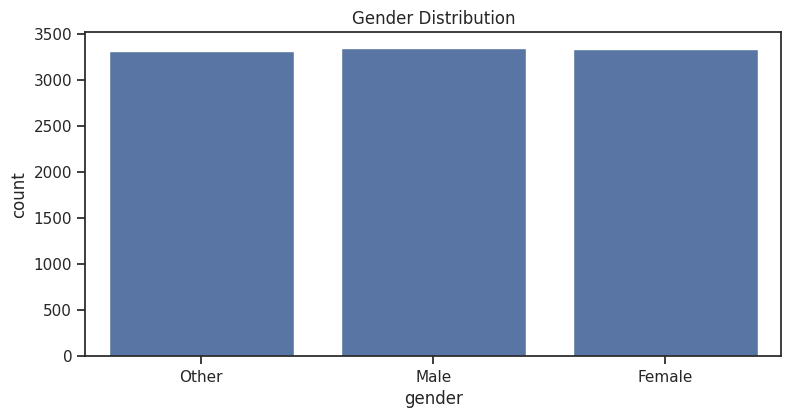

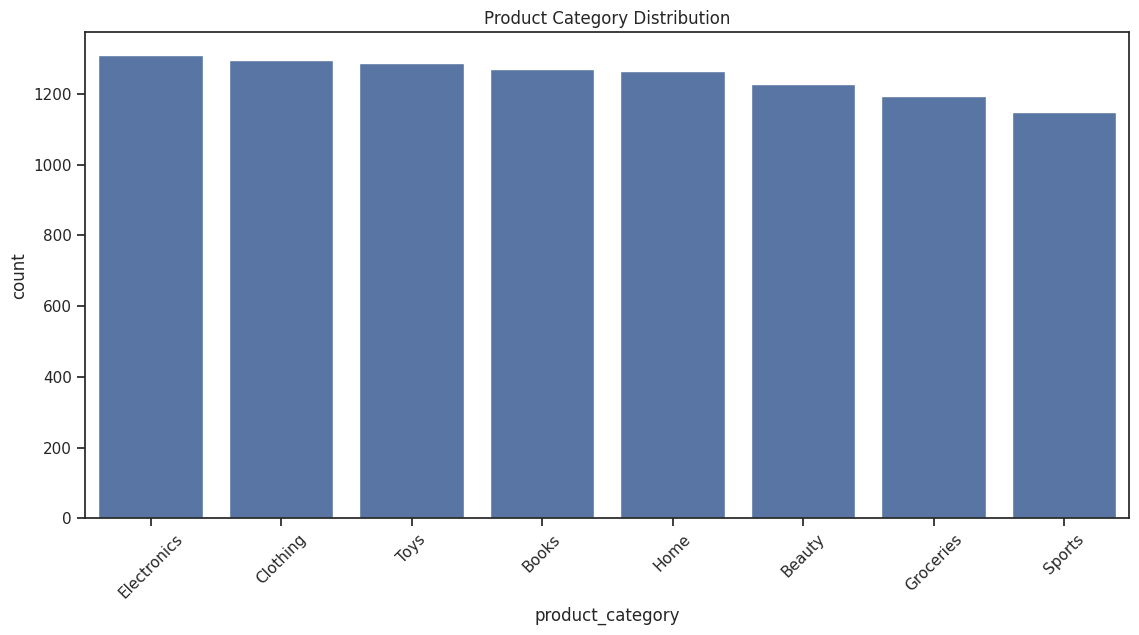

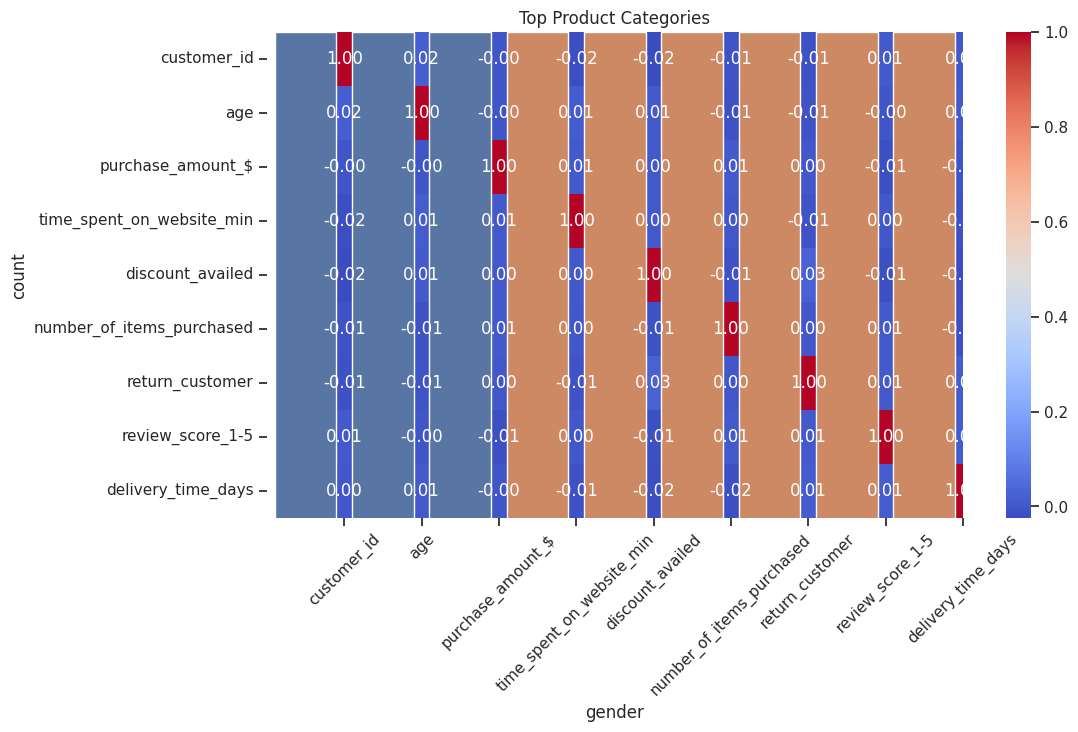

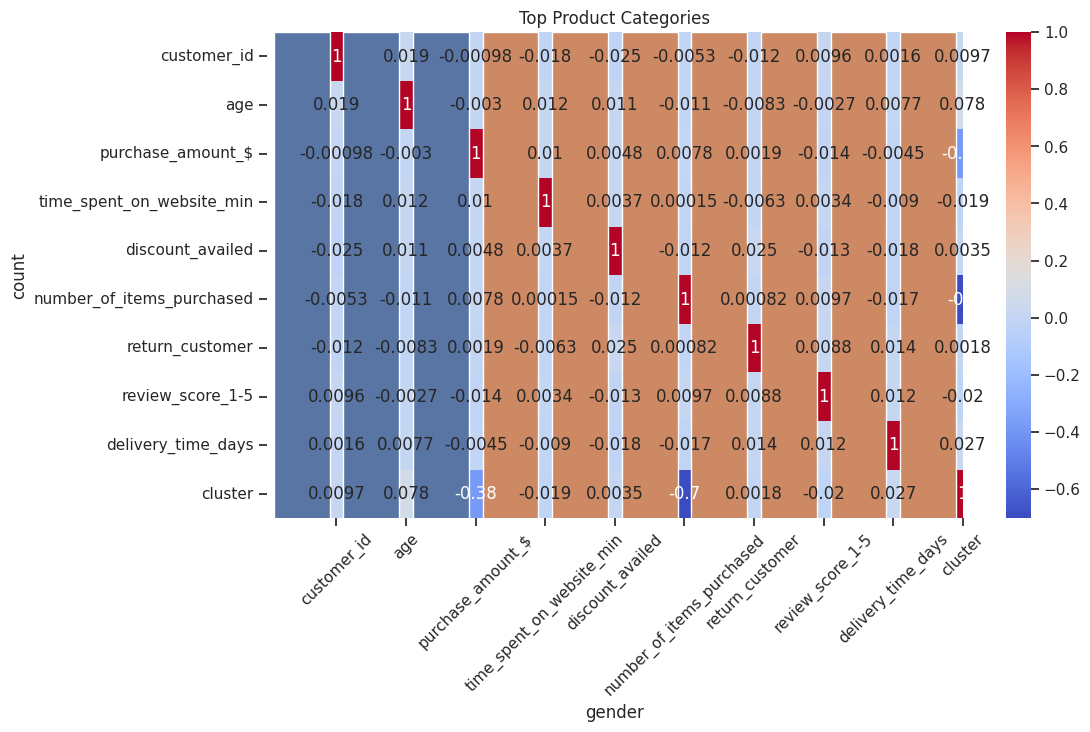

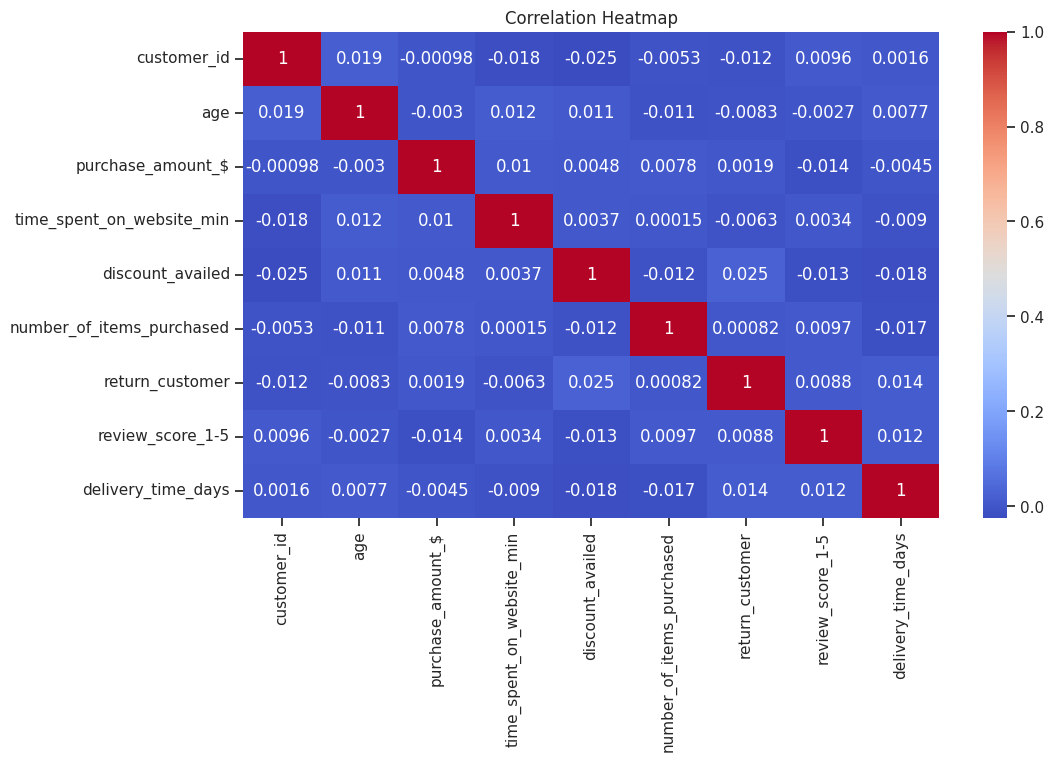

<Figure size 1200x600 with 0 Axes>

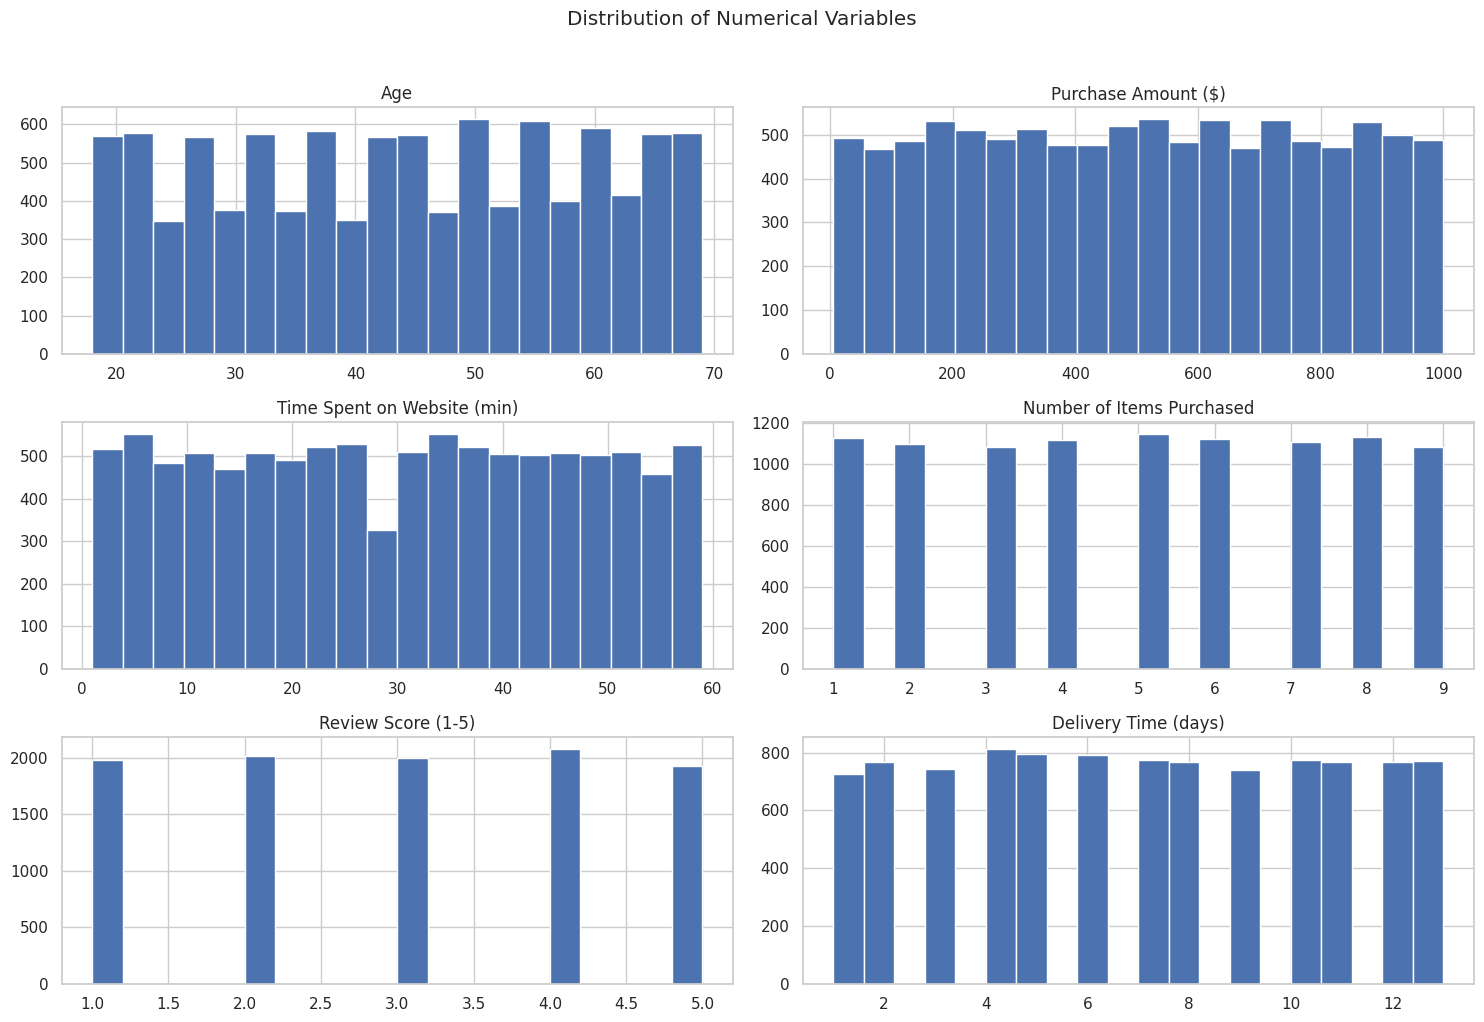

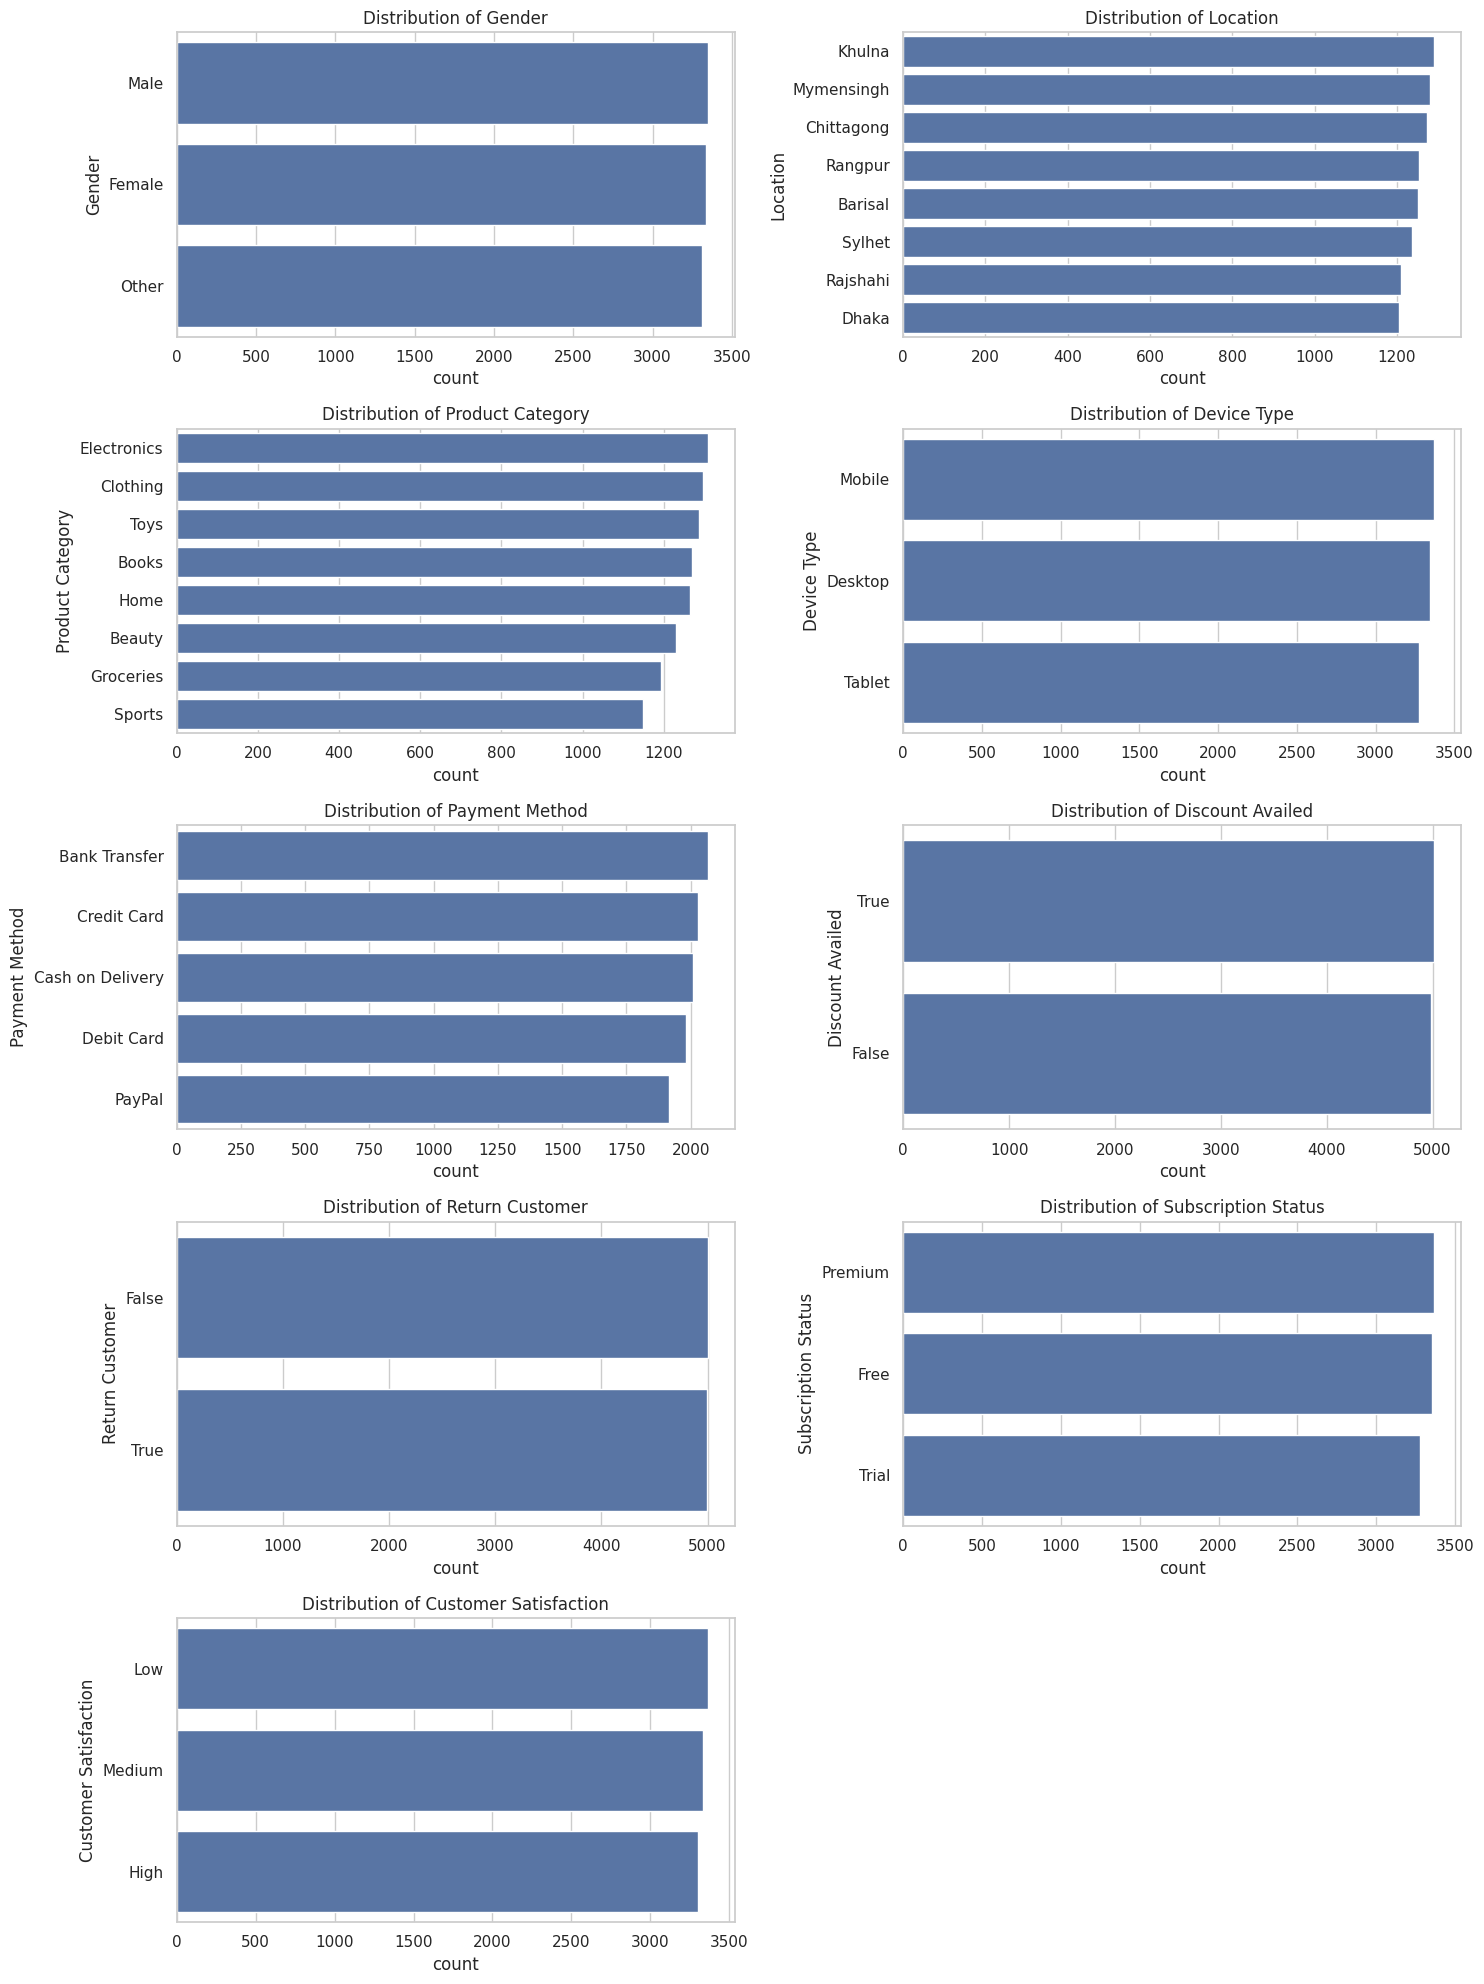

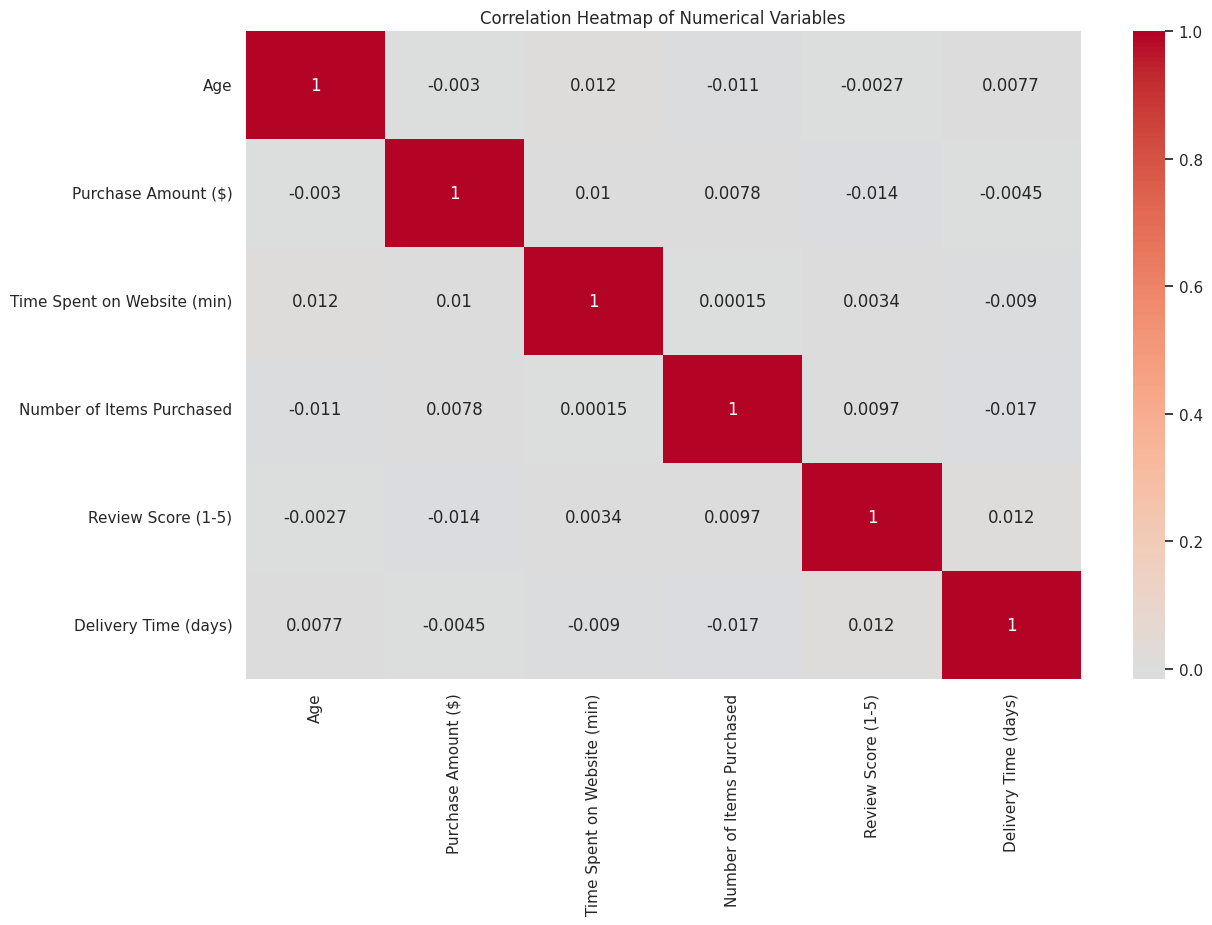

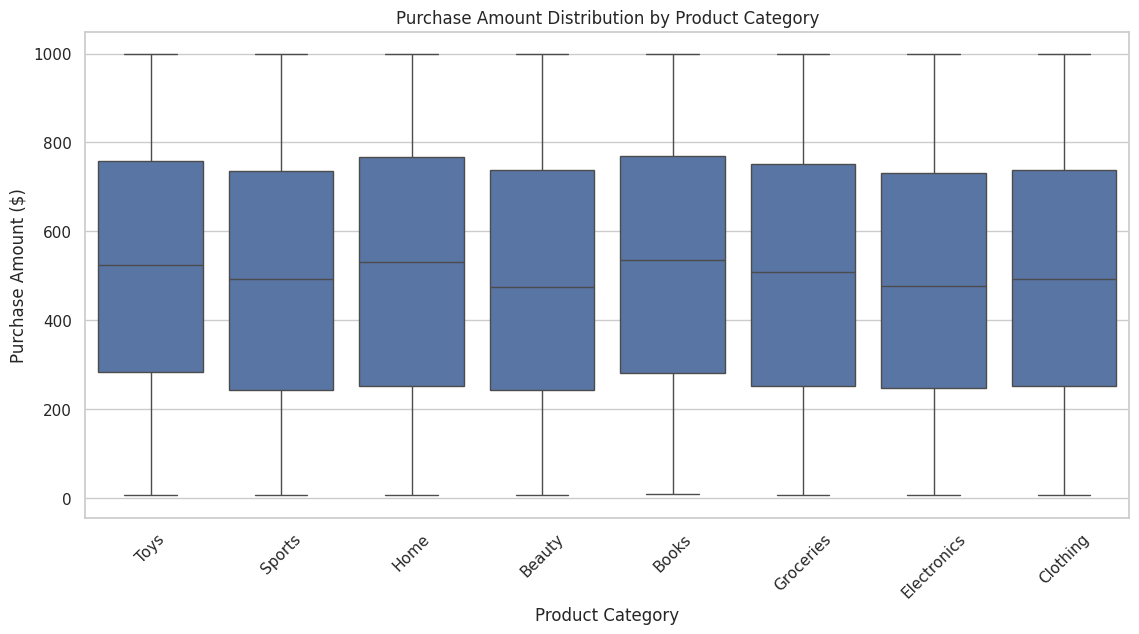

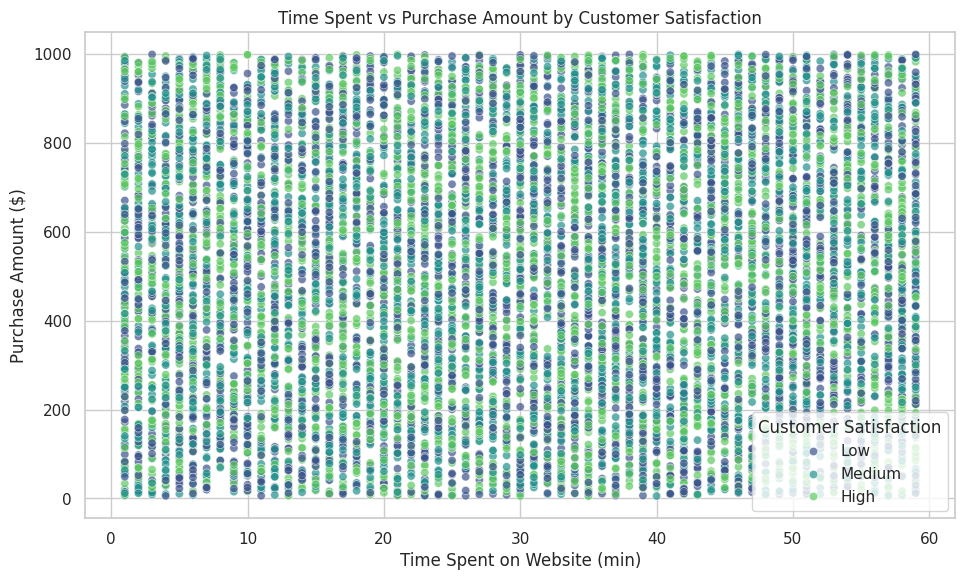

<Figure size 1200x600 with 0 Axes>

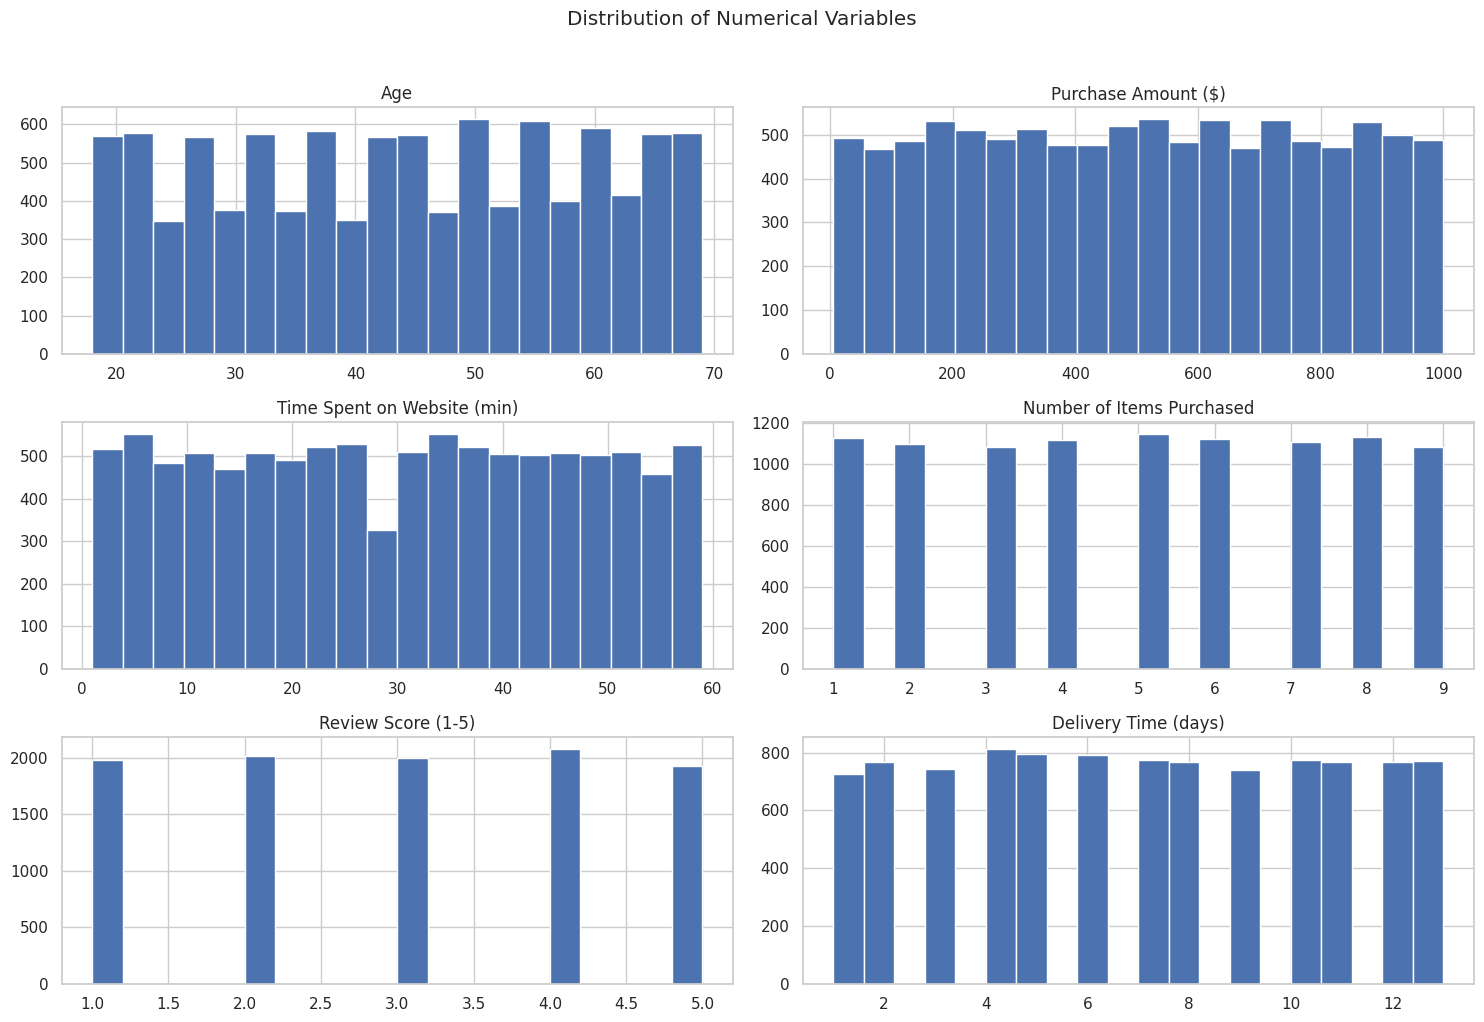

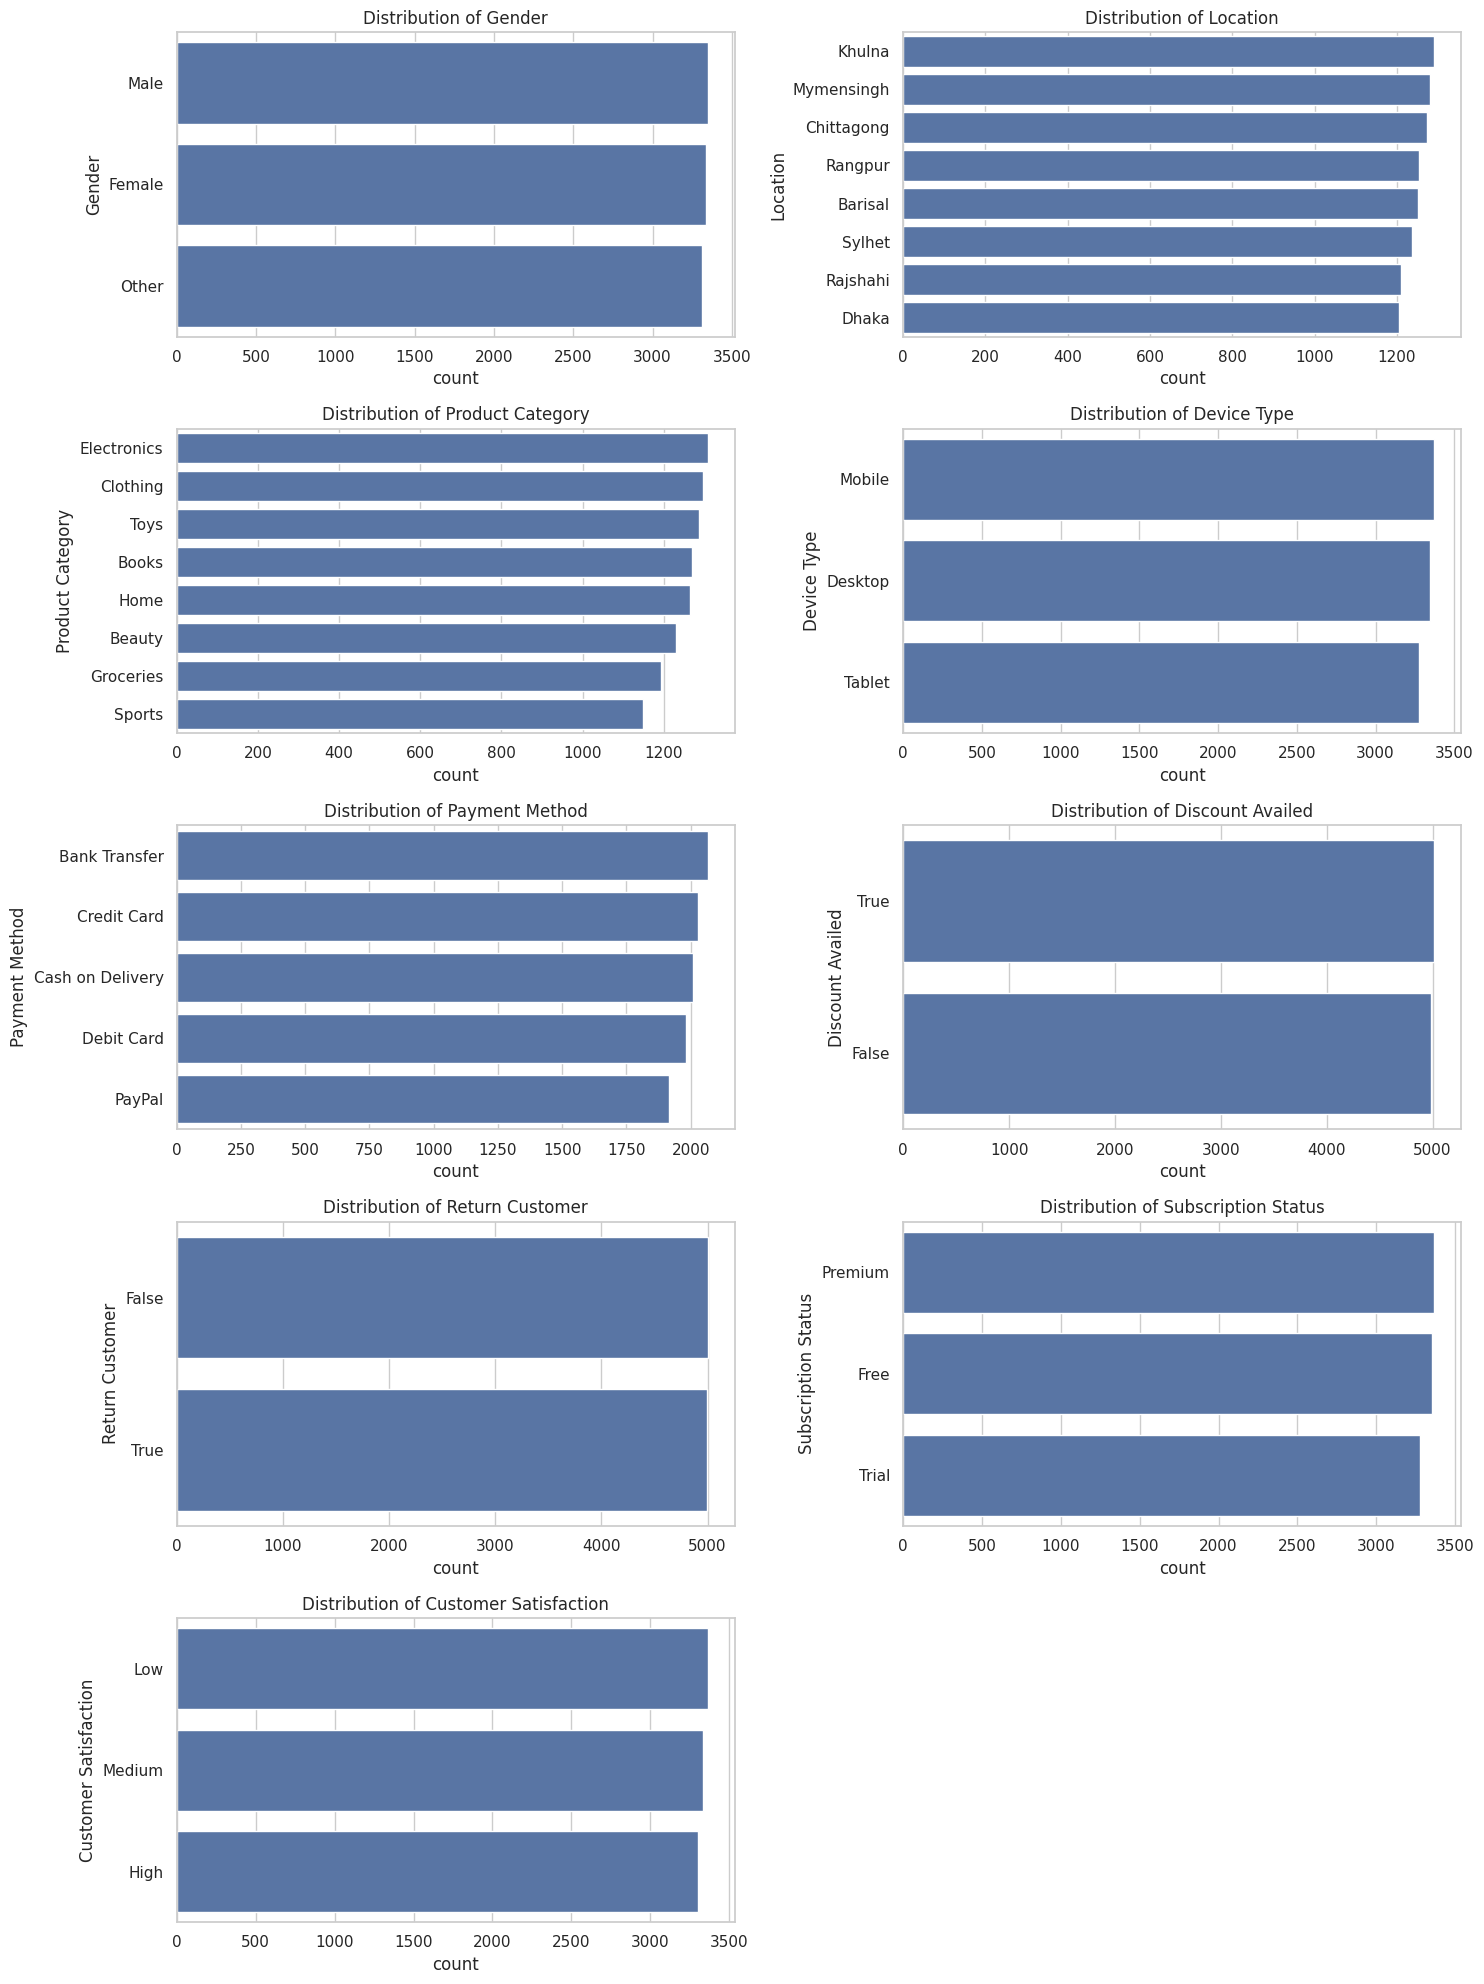

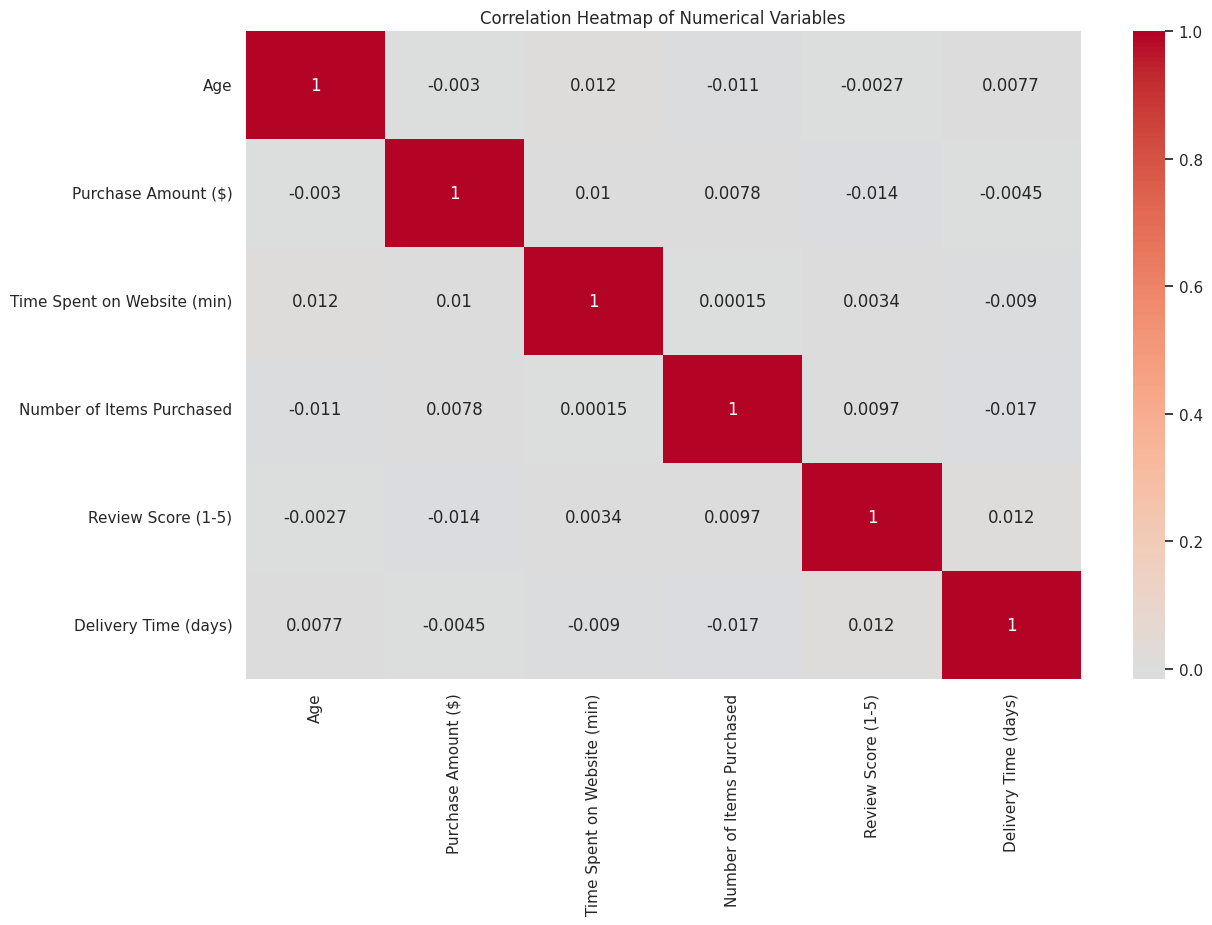

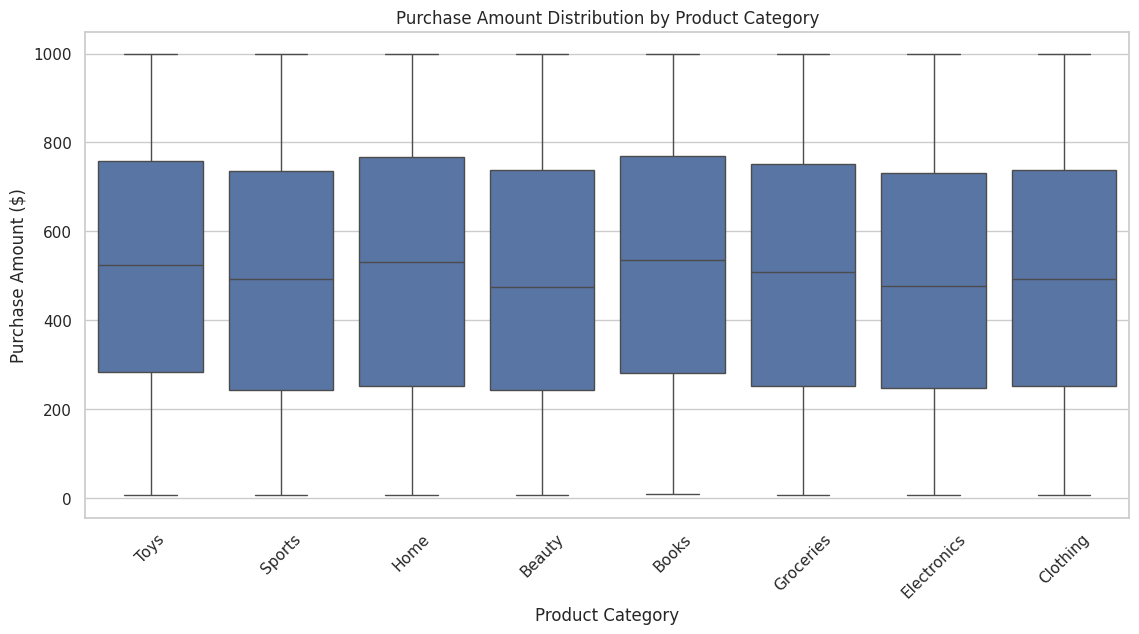

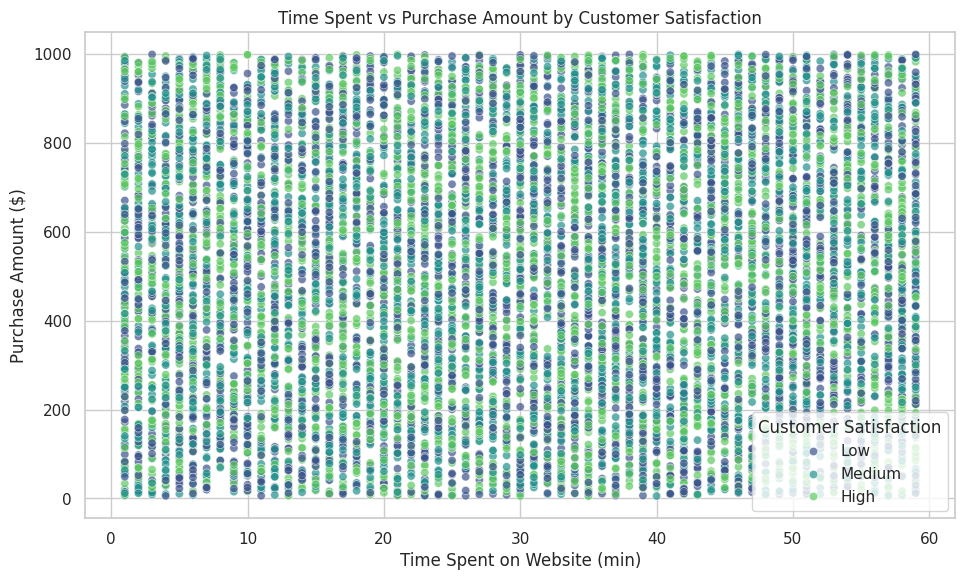

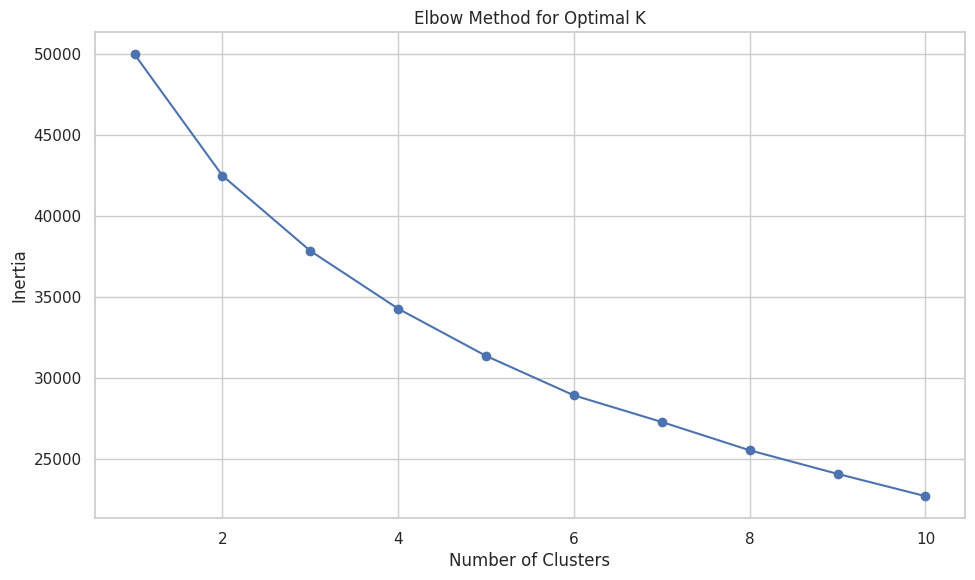

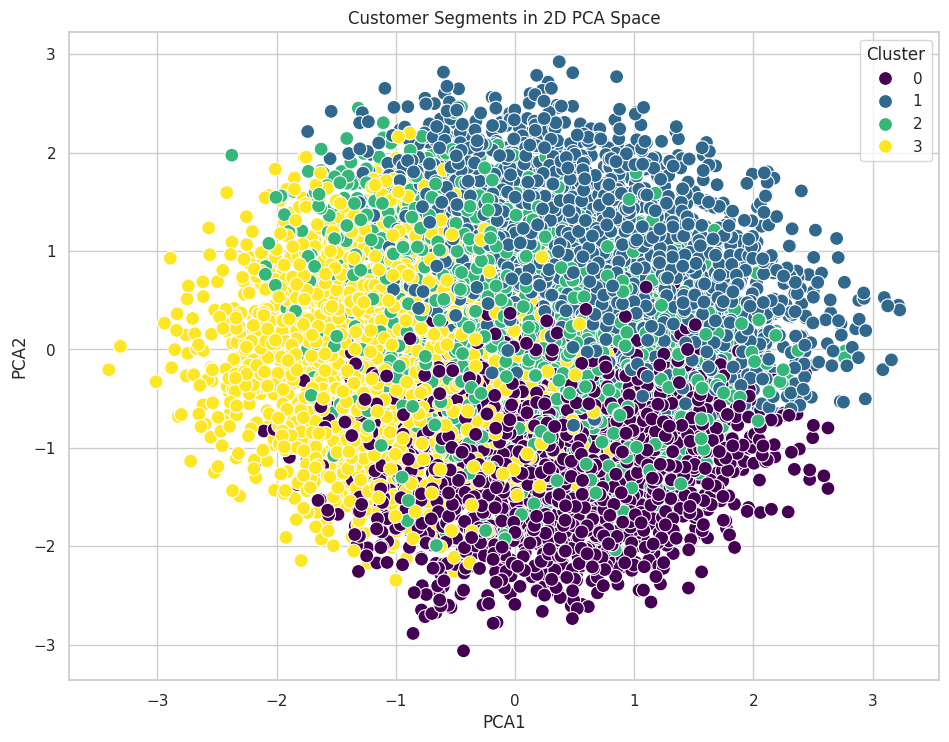

<Figure size 1200x800 with 0 Axes>

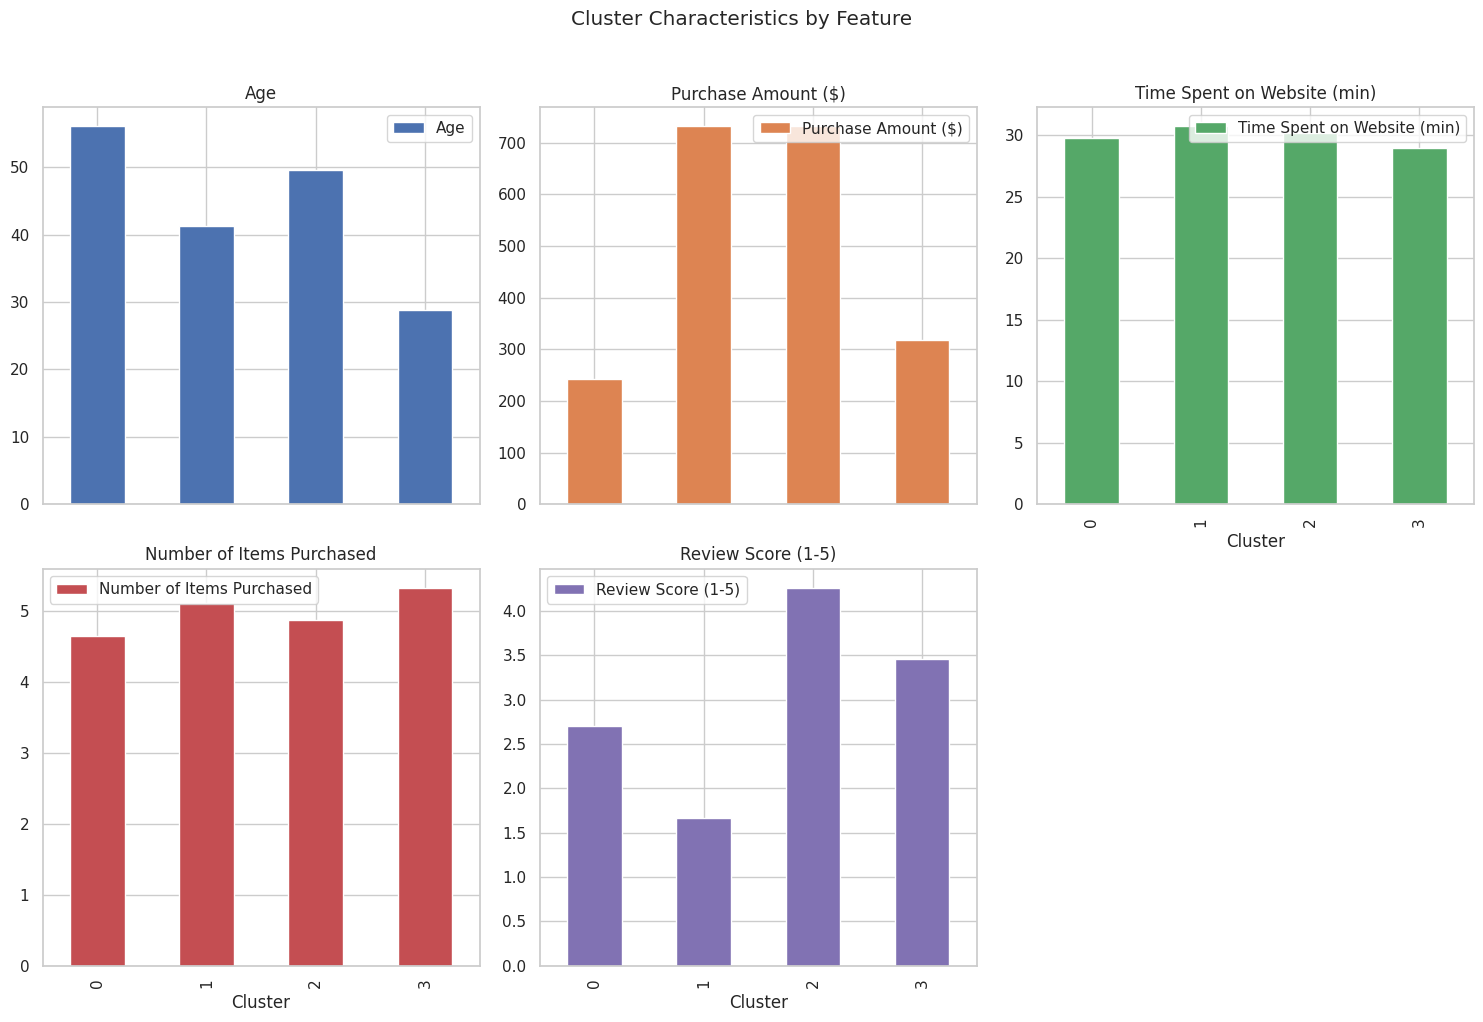

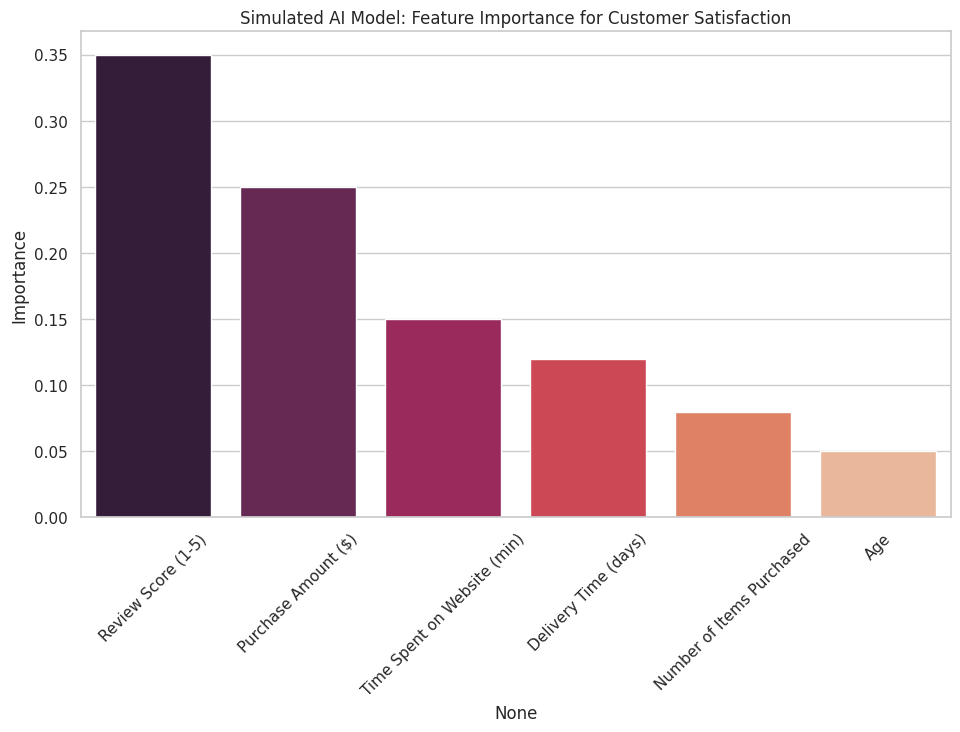

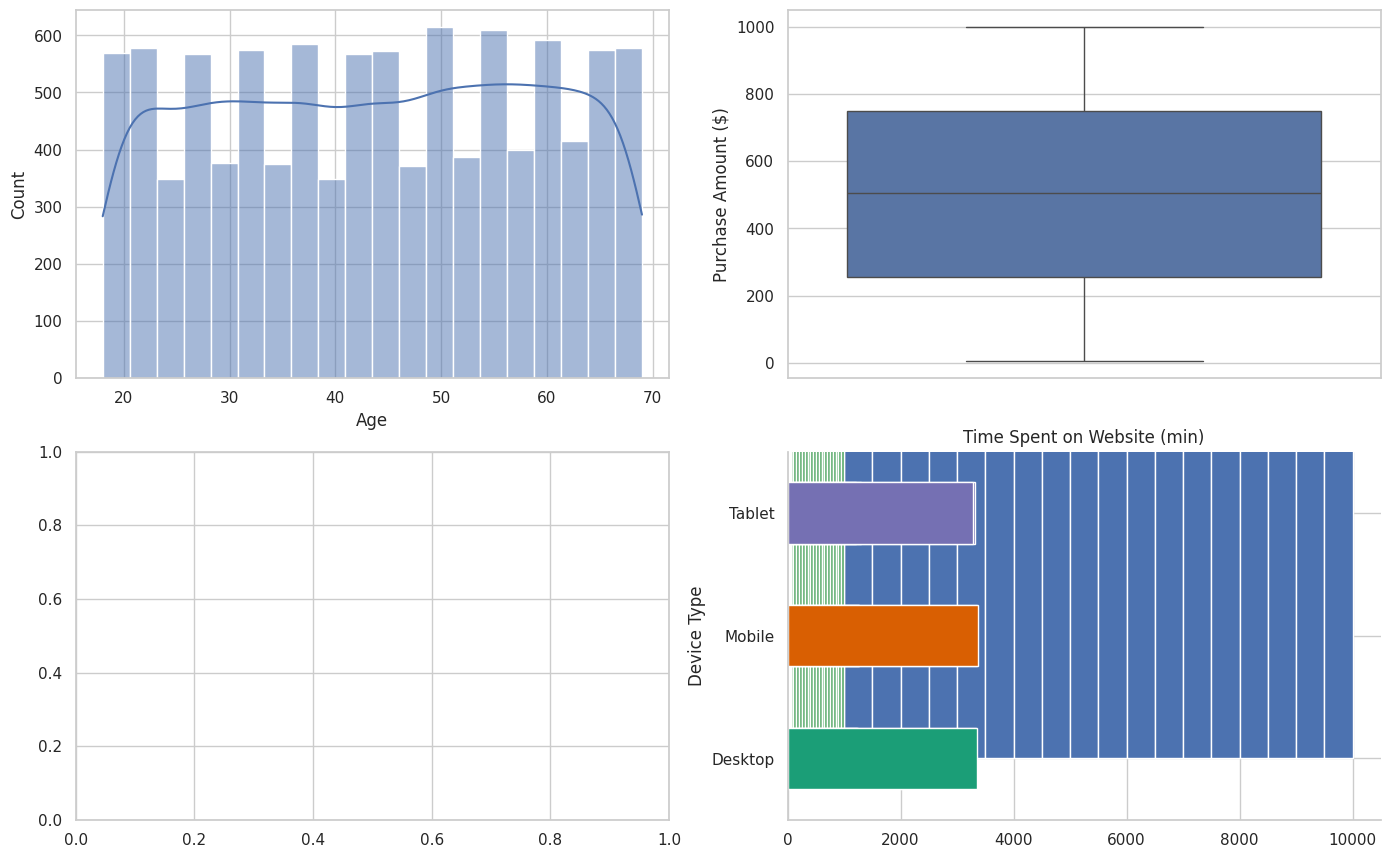

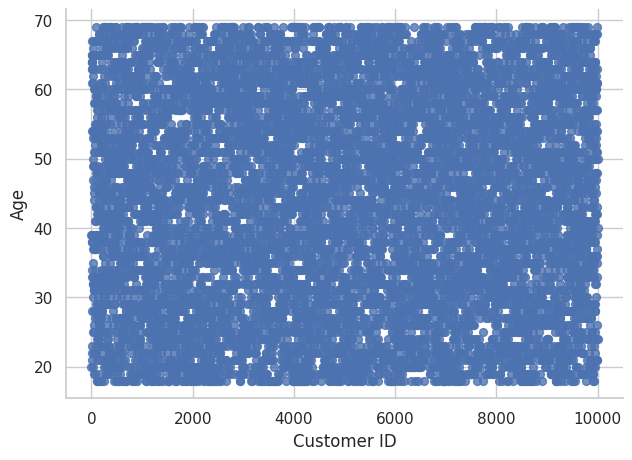

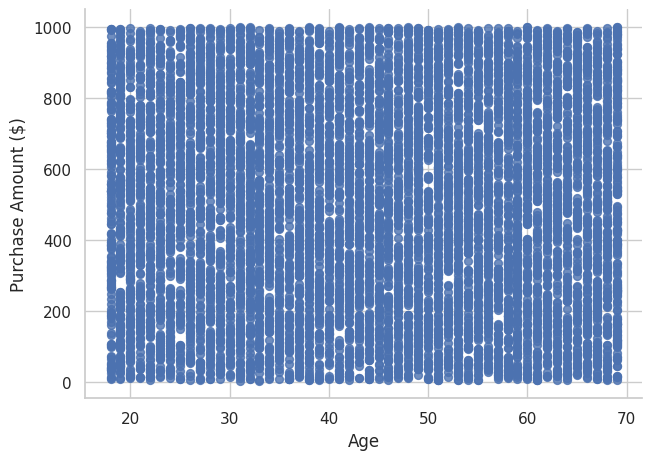

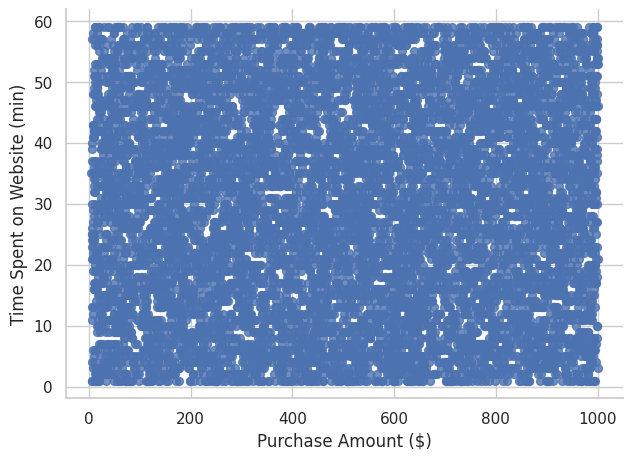

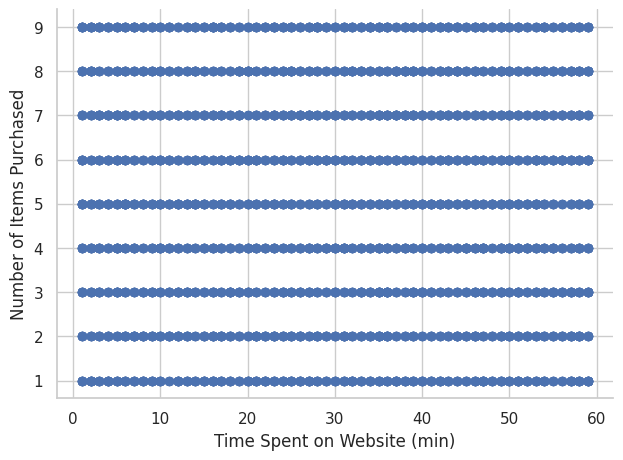

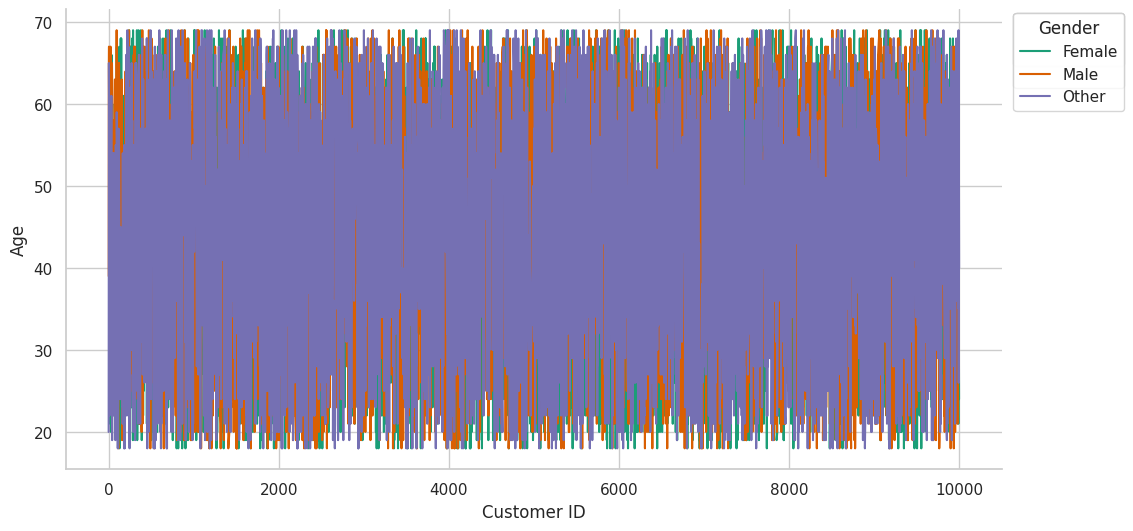

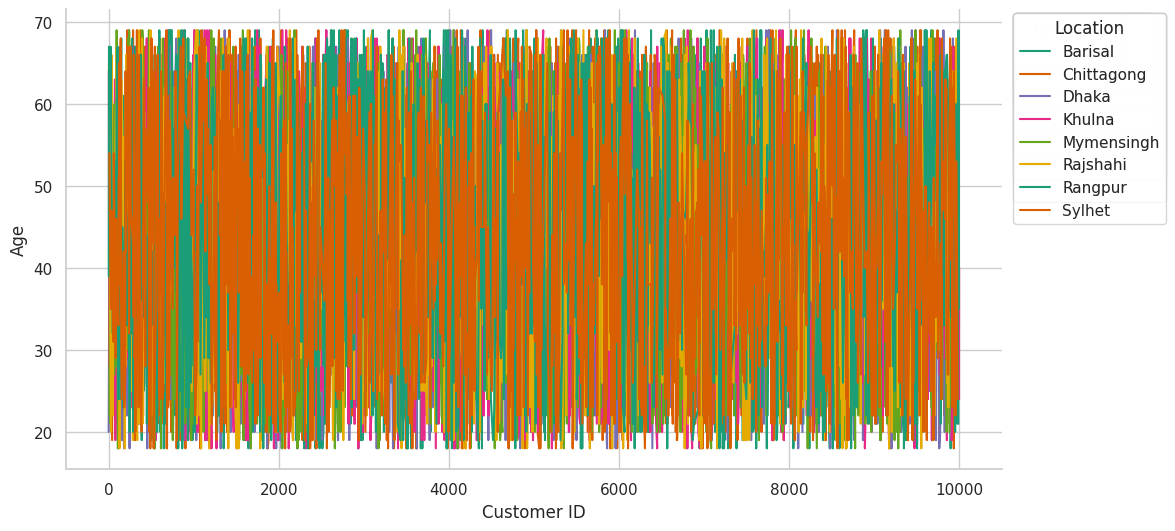

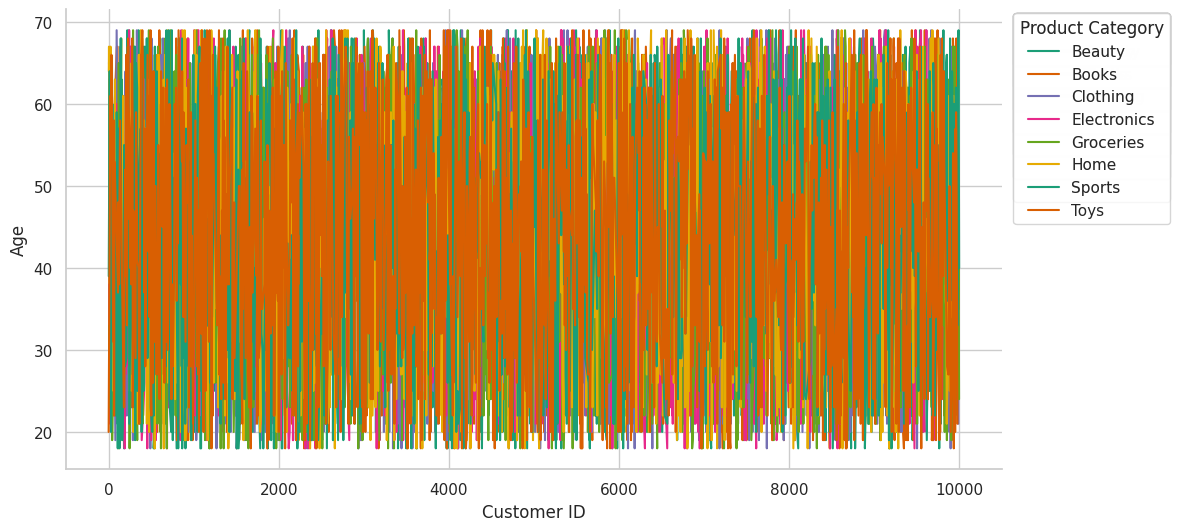

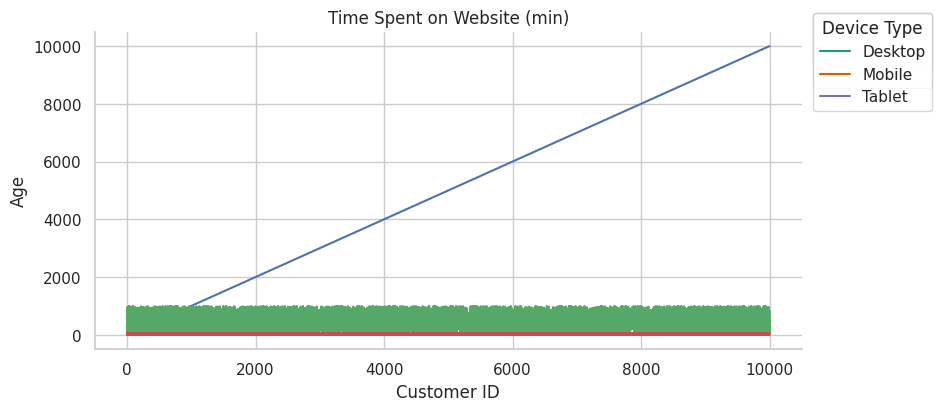

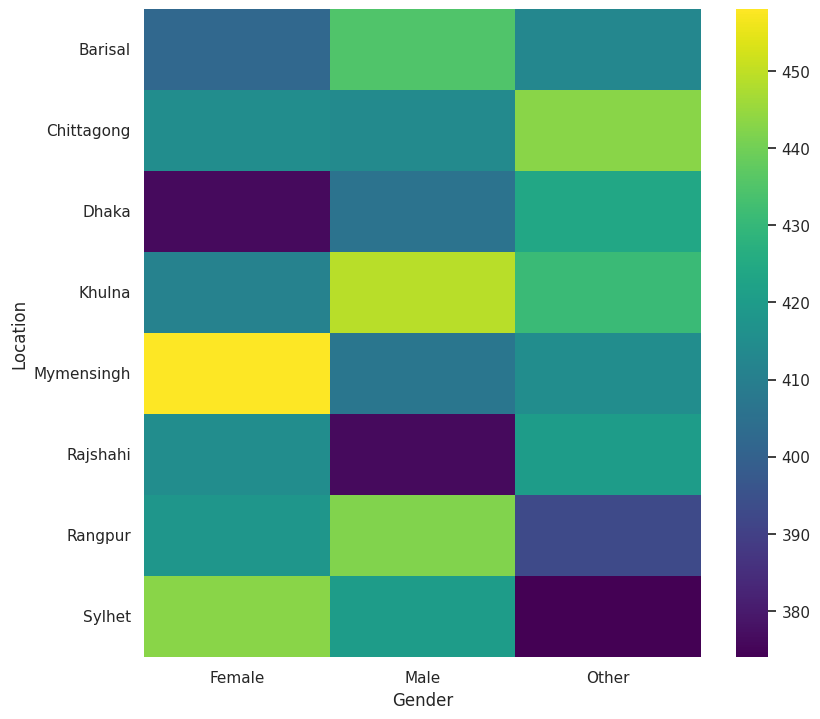

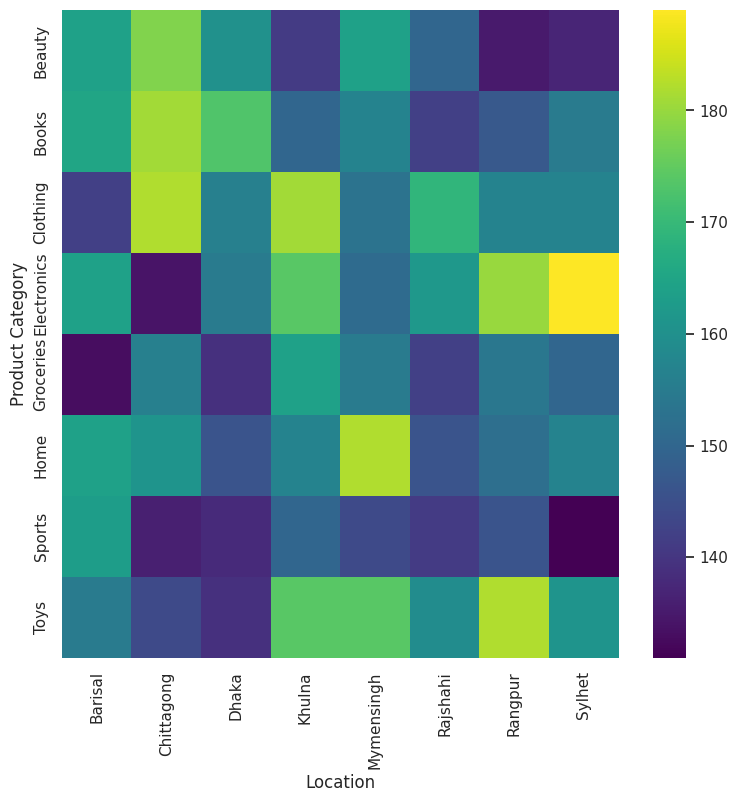

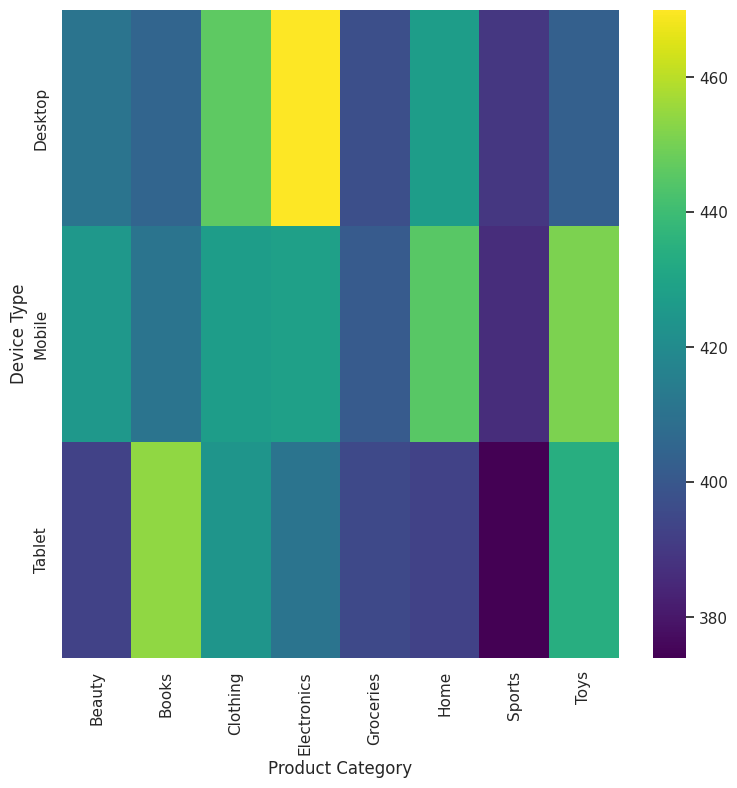

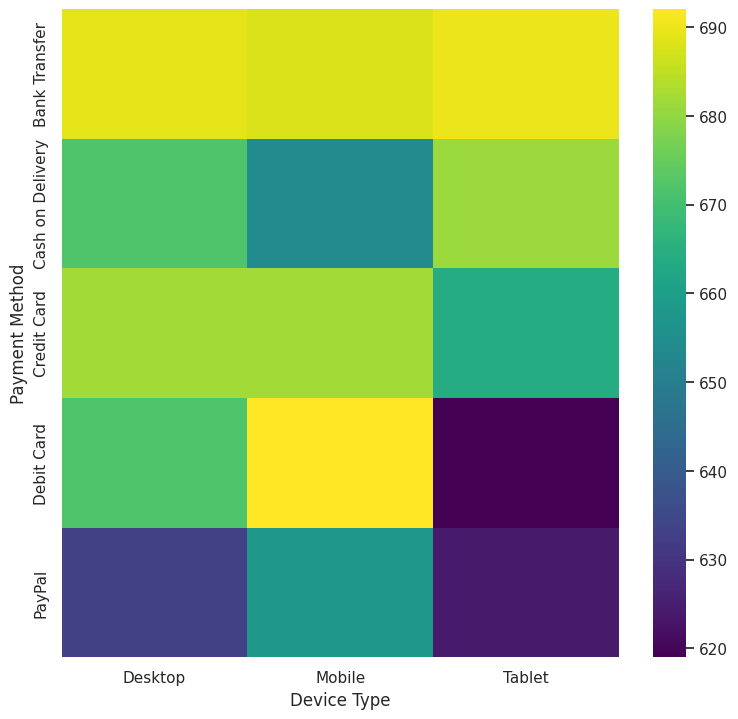

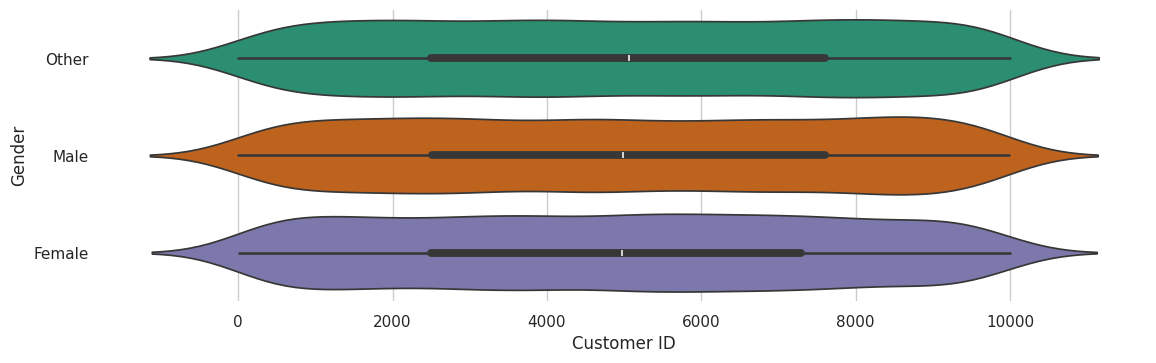

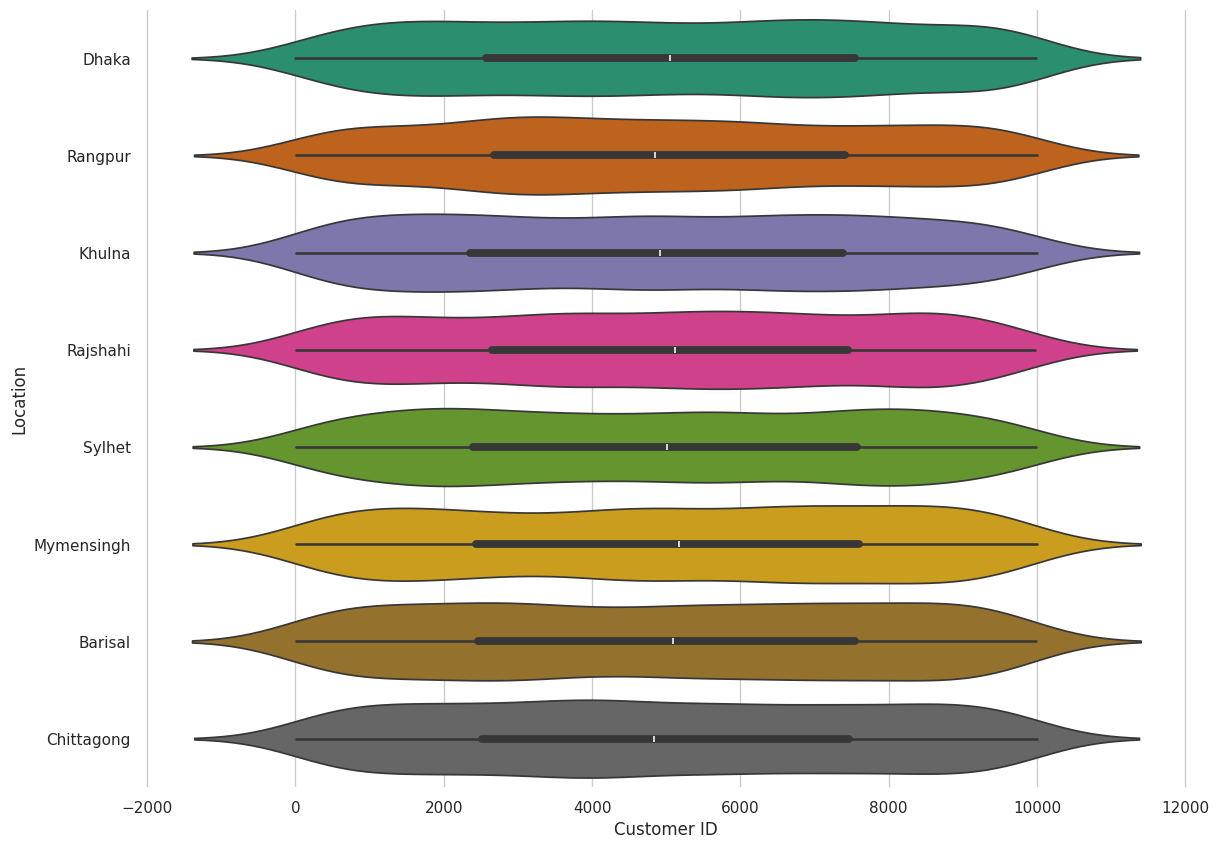

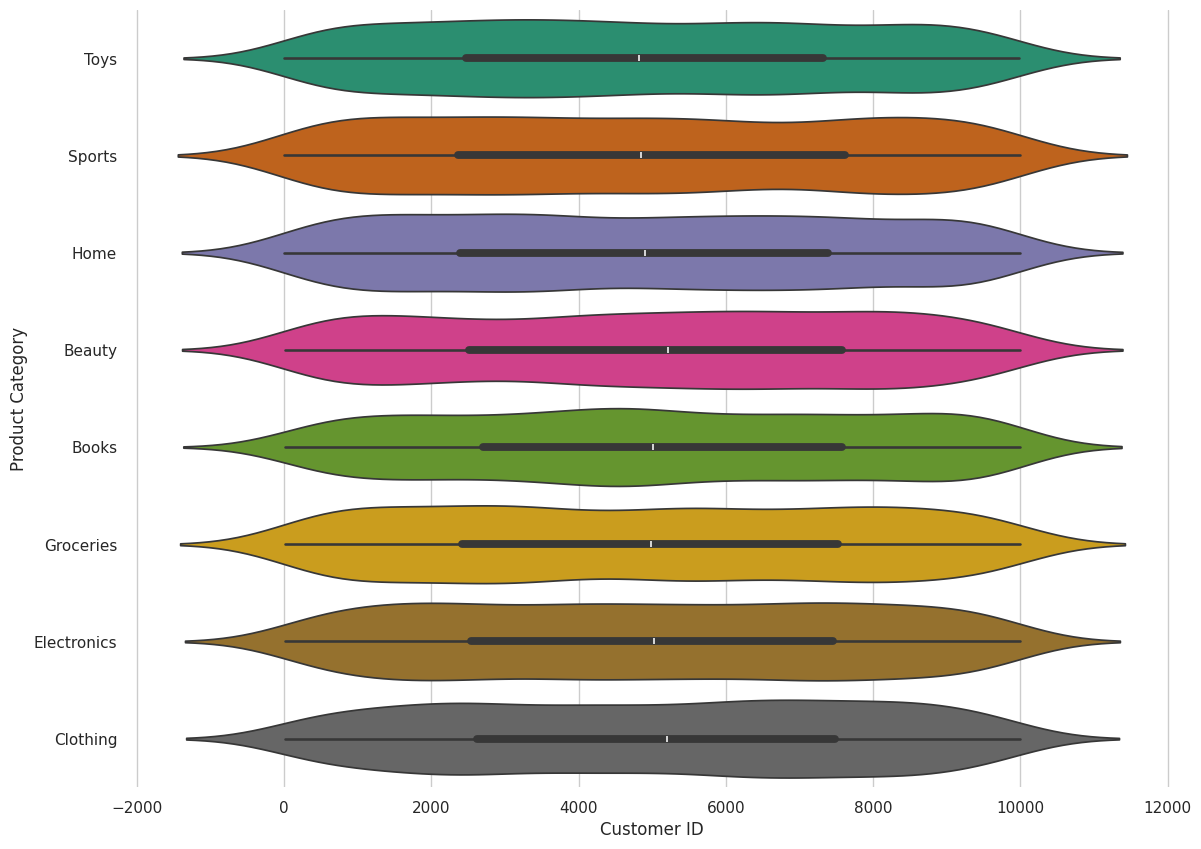

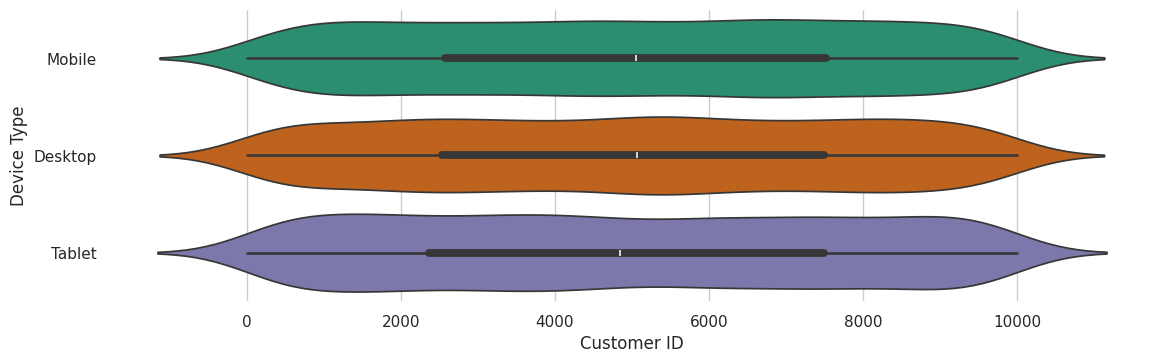

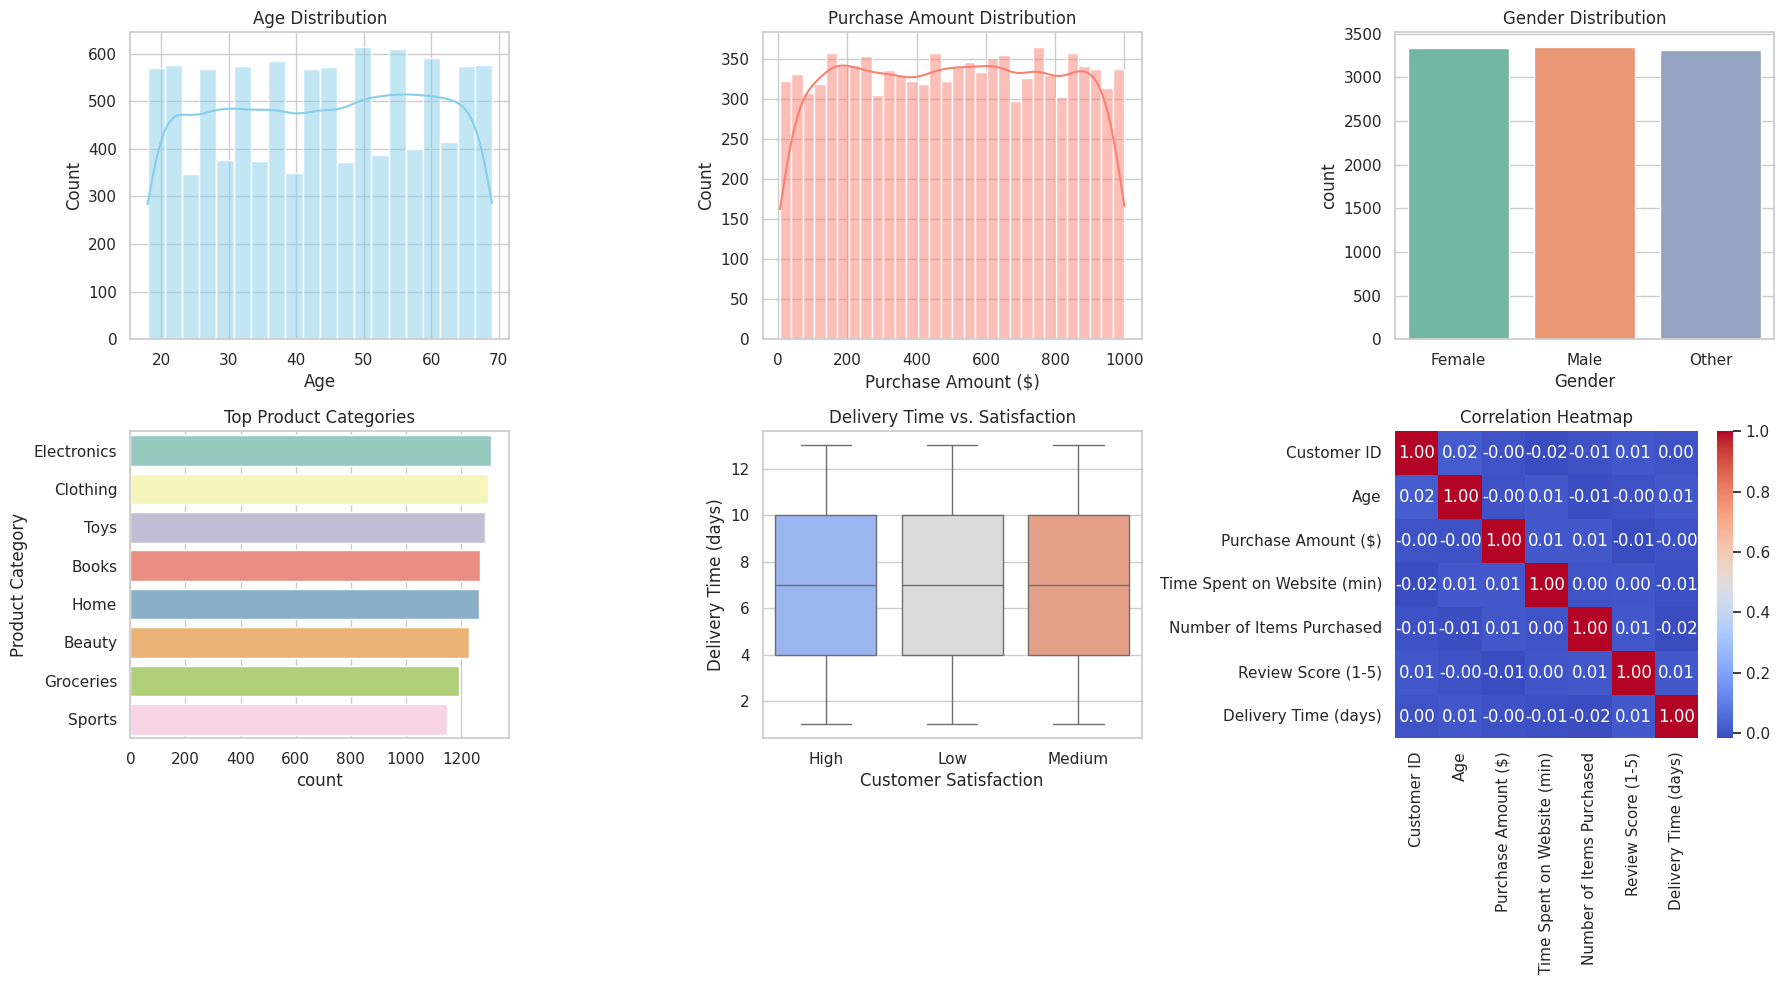

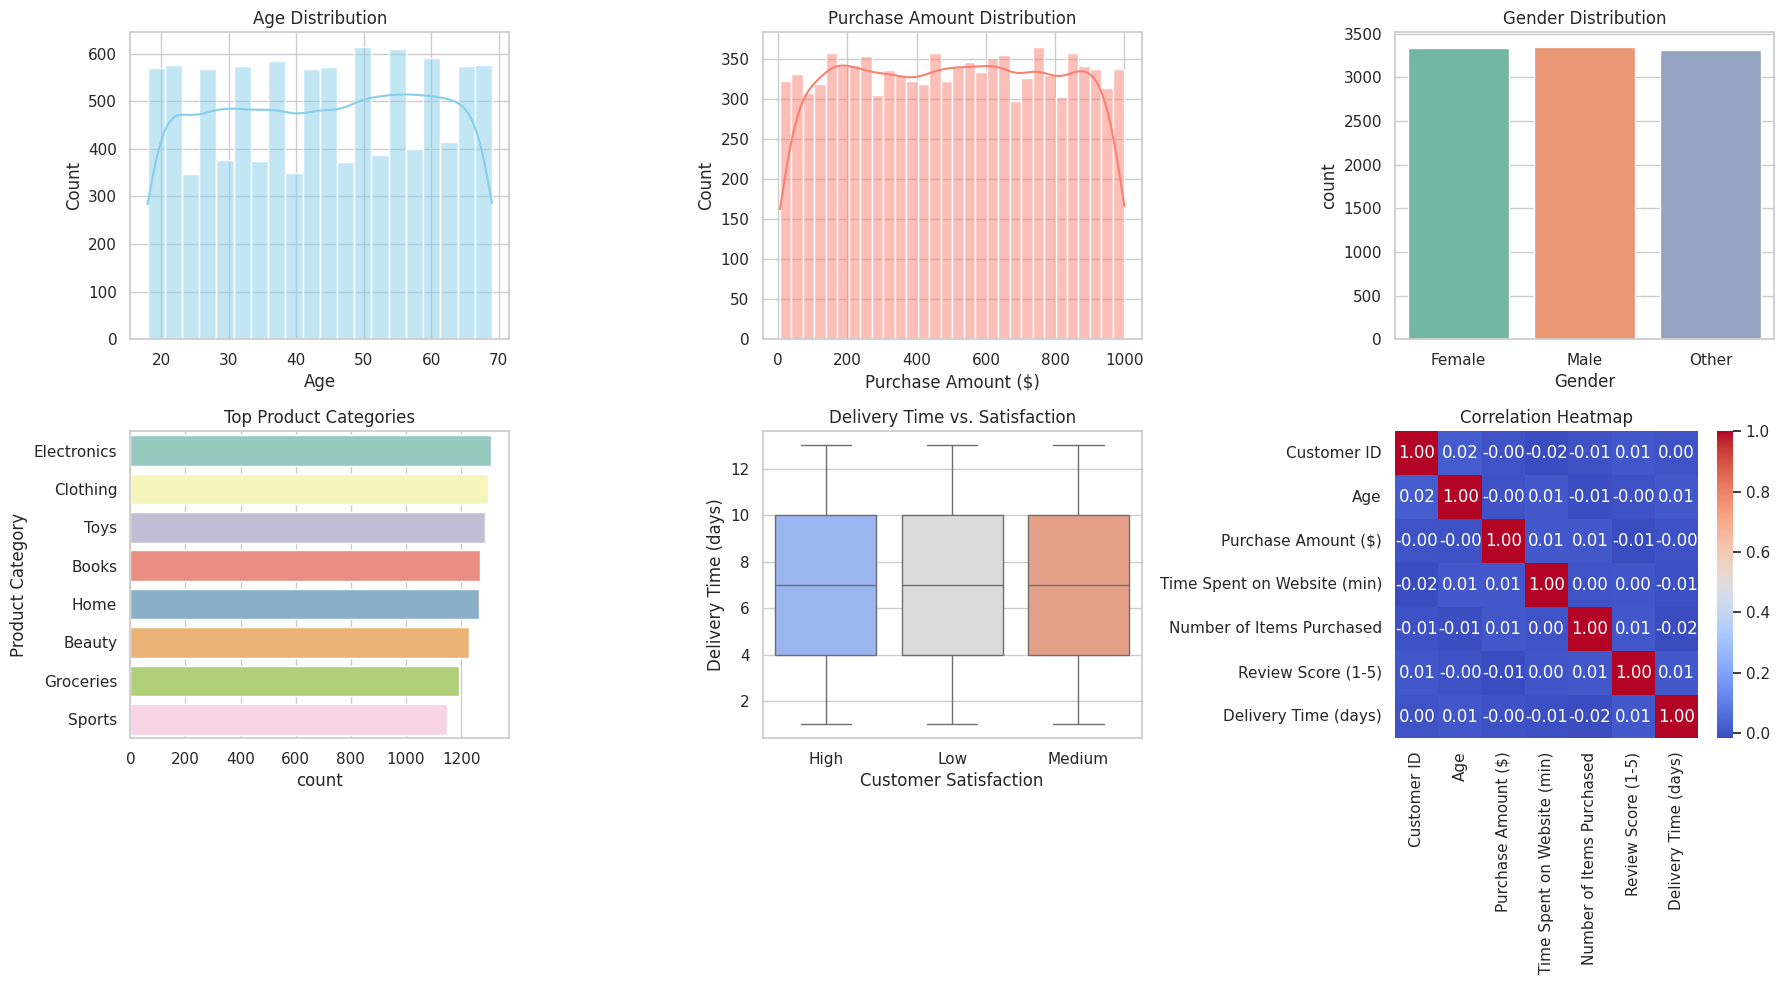

In [ ]:

# 📊 4. Exploratory Data Analysis (EDA)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Age Distribution")

sns.histplot(df['Purchase Amount ($)'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title("Purchase Amount Distribution")

sns.countplot(data=df, x='Gender', palette='Set2', ax=axes[0, 2])
axes[0, 2].set_title("Gender Distribution")

sns.countplot(data=df, y='Product Category', palette='Set3',
              order=df['Product Category'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title("Top Product Categories")

sns.boxplot(data=df, x='Customer Satisfaction', y='Delivery Time (days)',
            palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Delivery Time vs. Satisfaction")

# Correlation
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 2])
axes[1, 2].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


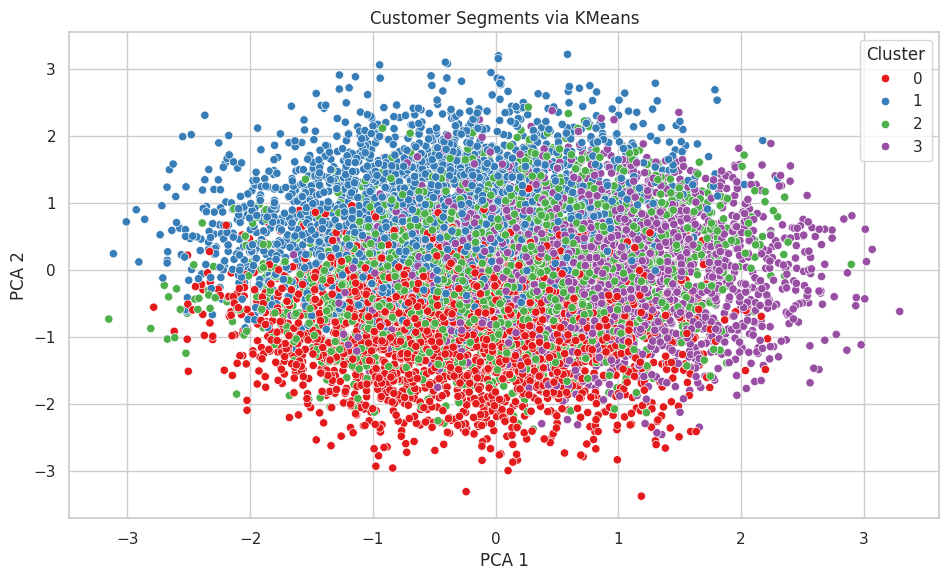

In [ ]:

# 5. AI-Powered Insight 1: KMeans Clustering

features = ['Age', 'Purchase Amount ($)', 'Time Spent on Website (min)',
            'Number of Items Purchased', 'Review Score (1-5)', 'Delivery Time (days)']
X = df[features]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("Customer Segments via KMeans")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# 📦 STEP 1: Install Required Packages
!pip install -q streamlit pyngrok

# 📂 STEP 2: Write the Streamlit App to a File
streamlit_code = '''
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

st.set_page_config(page_title="E-commerce Customer Insights", layout="wide")

# Upload dataset
st.sidebar.title("Upload CSV")
file = st.sidebar.file_uploader("Upload your e-commerce dataset", type=["csv"])

if file is not None:
    df = pd.read_csv(file)

    st.title(" AI-Powered E-Commerce Customer Dashboard")

    st.subheader(" Dataset Preview")
    st.dataframe(df.head())

    st.subheader(" Basic Statistics")
    st.write(df.describe())

    st.subheader(" Exploratory Visualizations")
    col1, col2 = st.columns(2)
    with col1:
        st.markdown("**Age Distribution**")
        fig, ax = plt.subplots()
        sns.histplot(df["Age"], bins=20, kde=True, ax=ax, color='skyblue')
        st.pyplot(fig)
    with col2:
        st.markdown("**Purchase Amount Distribution**")
        fig, ax = plt.subplots()
        sns.histplot(df["Purchase Amount ($)"], bins=30, kde=True, ax=ax, color='salmon')
        st.pyplot(fig)

    col3, col4 = st.columns(2)
    with col3:
        st.markdown("**Gender Count**")
        fig, ax = plt.subplots()
        sns.countplot(data=df, x='Gender', palette='Set2', ax=ax)
        st.pyplot(fig)
    with col4:
        st.markdown("**Top Product Categories**")
        fig, ax = plt.subplots()
        sns.countplot(data=df, y='Product Category', order=df['Product Category'].value_counts().index, palette='Set3', ax=ax)
        st.pyplot(fig)

    st.subheader("🤖 Customer Clustering (KMeans)")
    features = ['Age', 'Purchase Amount ($)', 'Time Spent on Website (min)',
                'Number of Items Purchased', 'Review Score (1-5)', 'Delivery Time (days)']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', ax=ax)
    ax.set_title("Customer Clusters via KMeans")
    st.pyplot(fig)

    st.subheader(" AI-Generated Insights")
    st.markdown("""
    - **Cluster 0** = High spenders + fast delivery (likely Premium)
    -  **18–30 users** browse more, buy less
    -  Review Score not tightly tied to Purchase
    -  COD still most popular
    - ⏱ Delivery > 7 days = low satisfaction

     **Recommendation**: Improve delivery time for non-premium customers
    """)

else:
    st.title("📊 AI E-Commerce Dashboard")
    st.info("Please upload your dataset (.csv) from the sidebar.")
'''

with open("streamlit_app.py", "w") as f:
    f.write(streamlit_code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
# 🔐 STEP 3: Authenticate ngrok (REPLACE THIS WITH YOUR TOKEN)
import os
os.environ["NGROK_AUTH_TOKEN"] = "2yytqTm1f2Qn4jeclgkhSg9qQDO_rrZMnzaAM7BpBxdqvMqQ"  # 🔁 Replace with your token

from pyngrok import conf, ngrok
conf.get_default().auth_token = os.environ["NGROK_AUTH_TOKEN"]


In [ ]:
#  STEP 4: Run Streamlit App with ngrok Tunnel
import threading
import time
import os

# Set the ngrok authentication token
os.environ["NGROK_AUTH_TOKEN"] = "2yytqTm1f2Qn4jeclgkhSg9qQDO_rrZMnzaAM7BpBxdqvMqQ" # Replace with your actual token or use Colab Secrets

from pyngrok import ngrok

# Terminate any existing ngrok tunnels
ngrok.kill()

def run():
    !streamlit run streamlit_app.py --server.port 8501

thread = threading.Thread(target=run)
thread.start()

time.sleep(5)
try:
    public_url = ngrok.connect(8501).public_url
    print("✅ Streamlit is live at:", public_url)
except Exception as e:
    print(f"Error starting ngrok tunnel: {e}")



2025-07-07 15:37:36.724 Port 8501 is already in use
✅ Streamlit is live at: https://679f-35-245-134-81.ngrok-free.app


In [ ]:
# --------------------------------------
# ✅ 7. Summary Tables for Report
# --------------------------------------

# Top 5 Locations by Avg Purchase
df.groupby("Location")["Purchase Amount ($)"].mean().sort_values(ascending=False).head()

# Satisfaction Breakdown
df["Customer Satisfaction"].value_counts(normalize=True).mul(100).round(2)


Customer Satisfaction
Low       33.65
Medium    33.31
High      33.04
Name: proportion, dtype: float64